## Import

In [1831]:
from types import NoneType

import pandas as pd
import numpy as np
import seaborn as sns

df = pd.read_csv('covid_combined_data.csv')
df['date'] = pd.to_datetime(df['date'])
df['Q'] = df['date'].dt.to_period('Q').astype(str)
countries_df = pd.read_csv('countries_combined_data.csv')
print(df['country_name'].unique())

['Argentina' 'India' 'Malaysia' 'United States of America' 'France'
 'Switzerland' 'Italy' 'Austria' 'United Kingdom' 'Brazil' 'Australia'
 'Poland' 'Czech Republic' 'Finland' 'Bulgaria' 'Cyprus' 'Japan'
 'Slovenia' 'Israel' 'Kuwait' 'New Zealand' 'Philippines' 'Taiwan' 'Iraq'
 'Serbia' 'Bolivia' 'Ireland' 'Liechtenstein' 'Lithuania' 'Morocco'
 'Indonesia' 'Saudi Arabia' 'Belgium' 'Greece' 'Ivory Coast' 'Georgia'
 'Mexico' 'Norway' 'Canada' 'Mongolia' 'Maldives' 'Slovakia' 'Estonia'
 'Denmark' 'Bahrain' 'Saint Kitts and Nevis' 'Latvia' 'Ecuador' 'Zimbabwe'
 'United Arab Emirates' 'South Africa' 'Suriname' 'Jamaica' 'South Korea'
 'Colombia' 'Saint Vincent and the Grenadines' 'Iceland' 'Albania'
 'Tunisia' 'Cambodia' 'Trinidad and Tobago' 'Pakistan' 'Sri Lanka' 'Malta'
 'Guatemala' 'Ukraine' 'Uruguay' 'Rwanda' 'Turkey' 'Bangladesh' 'Sweden'
 'Paraguay' 'Costa Rica' 'El Salvador' 'Hungary' 'Netherlands' 'Qatar'
 'Luxembourg' 'Kazakhstan' 'Fiji' 'Thailand' 'Panama' 'Senegal' 'Togo'
 'Azer

In [1832]:
df.head()

,location_key,subregion1_code_x,subregion1_name_x,date,country_name_x,new_confirmed,cumulative_confirmed,new_tested,cumulative_tested,subregion1_code_y,...,subregion1_code,subregion1_name,country_name,new_persons_vaccinated,cumulative_persons_vaccinated,new_persons_fully_vaccinated,cumulative_persons_fully_vaccinated,new_vaccine_doses_administered,cumulative_vaccine_doses_administered,Q
0,AR_U,U,Chubut,2021-06-03,Argentina,352,65456,647,127262,U,...,U,Chubut,Argentina,1157,54564,413,18606,1570,73170,2021Q2
1,IN_AS,AS,Assam,2021-06-25,India,2793,496481,139105,14339556,AS,...,AS,Assam,India,158705,5536768,17540,1152586,176245,6689354,2021Q2
2,MY_02,02,Kedah,2022-01-24,Malaysia,395,174374,8098,1321133,02,...,02,Kedah,Malaysia,74,1596945,257,1577276,8236,3714419,2022Q1
3,US_DE,DE,Delaware,2021-11-04,United States of America,276,145284,1121,433596,DE,...,DE,Delaware,United States of America,282,676753,119,585615,190,1323940,2021Q4
4,FR_PAC,PAC,Provence-Alpes-Côte d'Azur,2021-11-05,France,865,757955,37314,16882909,PAC,...,PAC,Provence-Alpes-Côte d'Azur,France,2486,3635163,3321,3526206,5807,7161369,2021Q4


In [1833]:
df.describe()
df['subregion1_code_x'].isna().sum()

25420

In [1834]:
countries_df.head()

,location_key_x,subregion1_code_x,subregion1_name_x,country_code,country_name,iso_3166_1_alpha_2,iso_3166_1_alpha_3,population,population_male,population_female,...,gdp_2007,gdp_2008,gdp_2009,gdp_2010,gdp_2011,gdp_2012,gdp_2013,gdp_2014,gdp_2015,gdp_2016
0,BW,NaN,NaN,BW,Botswana,BW,BWA,2351625,1139099,1212526,...,1.093905e+10,1.094507e+10,1.026713e+10,1.278665e+10,1.568293e+10,1.468628e+10,1.491578e+10,1.625945e+10,1.443057e+10,1.558114e+10
1,EC,NaN,NaN,EC,Ecuador,EC,ECU,17643060,8823827,8819233,...,5.100778e+10,6.176264e+10,6.251969e+10,6.955537e+10,7.927666e+10,8.792454e+10,9.512966e+10,1.017263e+11,9.929038e+10,9.861397e+10
2,GQ,NaN,NaN,GQ,Equatorial Guinea,GQ,GNQ,1402985,780380,622605,...,1.307172e+10,1.974989e+10,1.502780e+10,1.629854e+10,2.132940e+10,2.238963e+10,2.194260e+10,2.173650e+10,1.259721e+10,1.068480e+10
3,GY,NaN,NaN,GY,Guyana,GY,GUY,786559,395549,391010,...,1.740335e+09,1.922598e+09,2.061324e+09,2.273225e+09,2.576024e+09,2.861562e+09,2.987684e+09,3.077643e+09,3.197225e+09,3.502397e+09
4,IT,NaN,NaN,IT,Italy,IT,ITA,60359546,29384766,30974780,...,2.203053e+12,2.390729e+12,2.185160e+12,2.125058e+12,2.276292e+12,2.072823e+12,2.130491e+12,2.151733e+12,1.832347e+12,1.858913e+12


In [1835]:
countries_df.describe()

,subregion1_code_x,subregion1_name_x,population,population_male,population_female,population_density_x,human_development_index,gdp_usd,gdp_per_capita_usd,latitude,...,gdp_2007,gdp_2008,gdp_2009,gdp_2010,gdp_2011,gdp_2012,gdp_2013,gdp_2014,gdp_2015,gdp_2016
count,0.0,0.0,1.370000e+02,1.370000e+02,1.370000e+02,137.000000,137.000000,1.370000e+02,137.000000,137.000000,...,1.370000e+02,1.370000e+02,1.370000e+02,1.370000e+02,1.370000e+02,1.370000e+02,1.370000e+02,1.370000e+02,1.370000e+02,1.360000e+02
mean,NaN,NaN,4.739199e+07,2.399633e+07,2.337054e+07,239.992328,0.715438,4.324655e+11,15769.686131,17.835316,...,2.804792e+11,3.150346e+11,2.982958e+11,3.304192e+11,3.734704e+11,3.778555e+11,3.879545e+11,3.978471e+11,3.678356e+11,3.745047e+11
std,NaN,NaN,1.725282e+08,8.893505e+07,8.361013e+07,763.884667,0.152899,1.408638e+12,20401.665167,25.185132,...,7.114949e+11,7.966928e+11,7.910842e+11,8.735504e+11,1.000325e+12,1.044687e+12,1.079501e+12,1.135234e+12,1.127300e+12,1.155853e+12
min,NaN,NaN,7.199100e+04,3.504100e+04,3.629800e+04,2.110000,0.354000,5.960333e+08,261.000000,-41.200000,...,4.213759e+08,4.581902e+08,4.890743e+08,4.938244e+08,5.010253e+08,4.859980e+08,5.019793e+08,5.236663e+08,5.350958e+08,5.814840e+08
25%,NaN,NaN,2.961161e+06,1.606609e+06,1.498593e+06,25.759000,0.591000,1.418044e+10,2229.000000,1.300000,...,7.880509e+09,8.496966e+09,8.621574e+09,1.000367e+10,1.151839e+10,1.229277e+10,1.258212e+10,1.278608e+10,1.169229e+10,1.101091e+10
50%,NaN,NaN,1.023018e+07,5.165979e+06,5.096935e+06,91.000000,0.741000,5.604591e+10,6977.000000,17.000000,...,2.674387e+10,3.186255e+10,3.547712e+10,3.841963e+10,4.226270e+10,4.386857e+10,4.764821e+10,4.916577e+10,4.892188e+10,4.737364e+10
75%,NaN,NaN,3.286627e+07,1.677100e+07,1.606720e+07,213.783000,0.831000,2.823182e+11,19116.000000,38.500000,...,1.787067e+11,2.081816e+11,1.924084e+11,2.336095e+11,2.522520e+11,2.500921e+11,2.699801e+11,2.609903e+11,2.425179e+11,2.549993e+11
max,NaN,NaN,1.439324e+09,7.382473e+08,7.010764e+08,8357.633000,0.957000,1.434290e+13,116348.000000,65.000000,...,4.515265e+12,5.037908e+12,5.231383e+12,6.100620e+12,7.572554e+12,8.560547e+12,9.607224e+12,1.048237e+13,1.106467e+13,1.119915e+13


## Część 1

1. Wykonaj wykresy pudełkowe (ang.box plot), które pozwolą na graficzną identyfikację wartości odstających poprzez przedstawienie kwartyli i wartości skrajnych w danych dotyczących:

1.1. liczby nowych zachorowań

D:\DevTools\Python\Python312\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


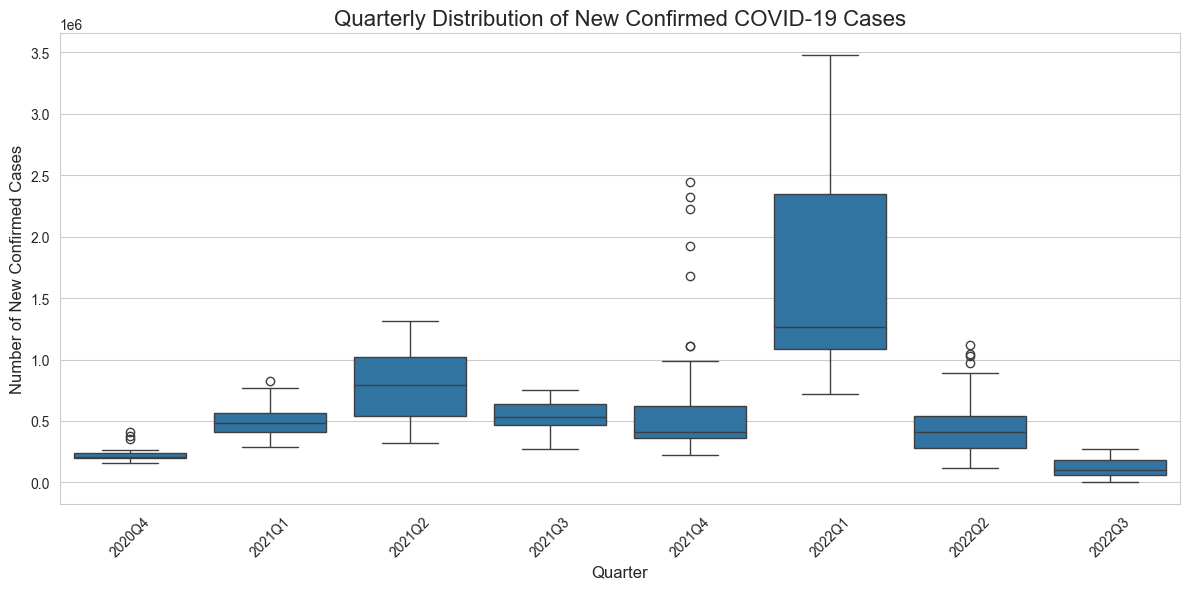

In [1836]:
import matplotlib.pyplot as plt
import seaborn as sns
confirmed_df = df.groupby('date')['new_confirmed'].sum().reset_index()
confirmed_df['Q'] = confirmed_df['date'].dt.to_period('Q').astype(str)

plt.figure(figsize=(12, 6))

sns.boxplot(x='Q', y='new_confirmed', data=confirmed_df)

plt.title('Quarterly Distribution of New Confirmed COVID-19 Cases', fontsize=16)
plt.xlabel('Quarter', fontsize=12)
plt.ylabel('Number of New Confirmed Cases', fontsize=12)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

1.2. liczby nowych śmierci



D:\DevTools\Python\Python312\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


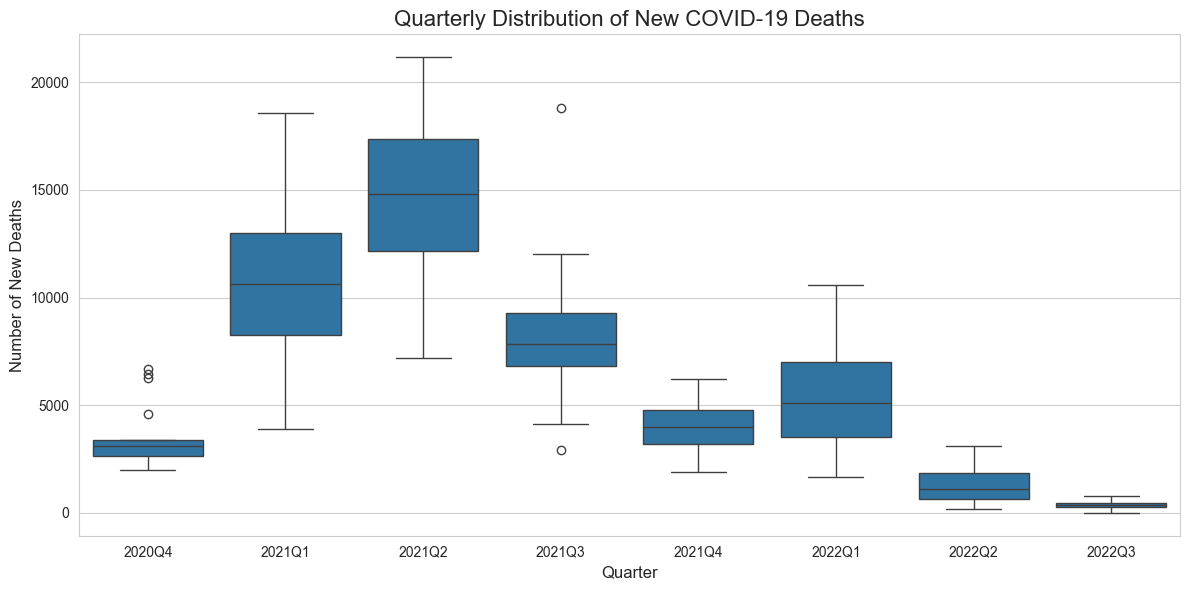

In [1837]:
deceased_df = df.groupby('date')['new_deceased'].sum().reset_index()
deceased_df['Q'] = deceased_df['date'].dt.to_period('Q').astype(str)

plt.figure(figsize=(12, 6))

sns.boxplot(x='Q', y='new_deceased', data=deceased_df)

plt.title('Quarterly Distribution of New COVID-19 Deaths', fontsize=16)
plt.xlabel('Quarter', fontsize=12)
plt.ylabel('Number of New Deaths', fontsize=12)

plt.tight_layout()
plt.show()

1.3. liczby nowych szczepień



D:\DevTools\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
D:\DevTools\Python\Python312\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
D:\DevTools\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
D:\DevTools\Python\Python312\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and wi

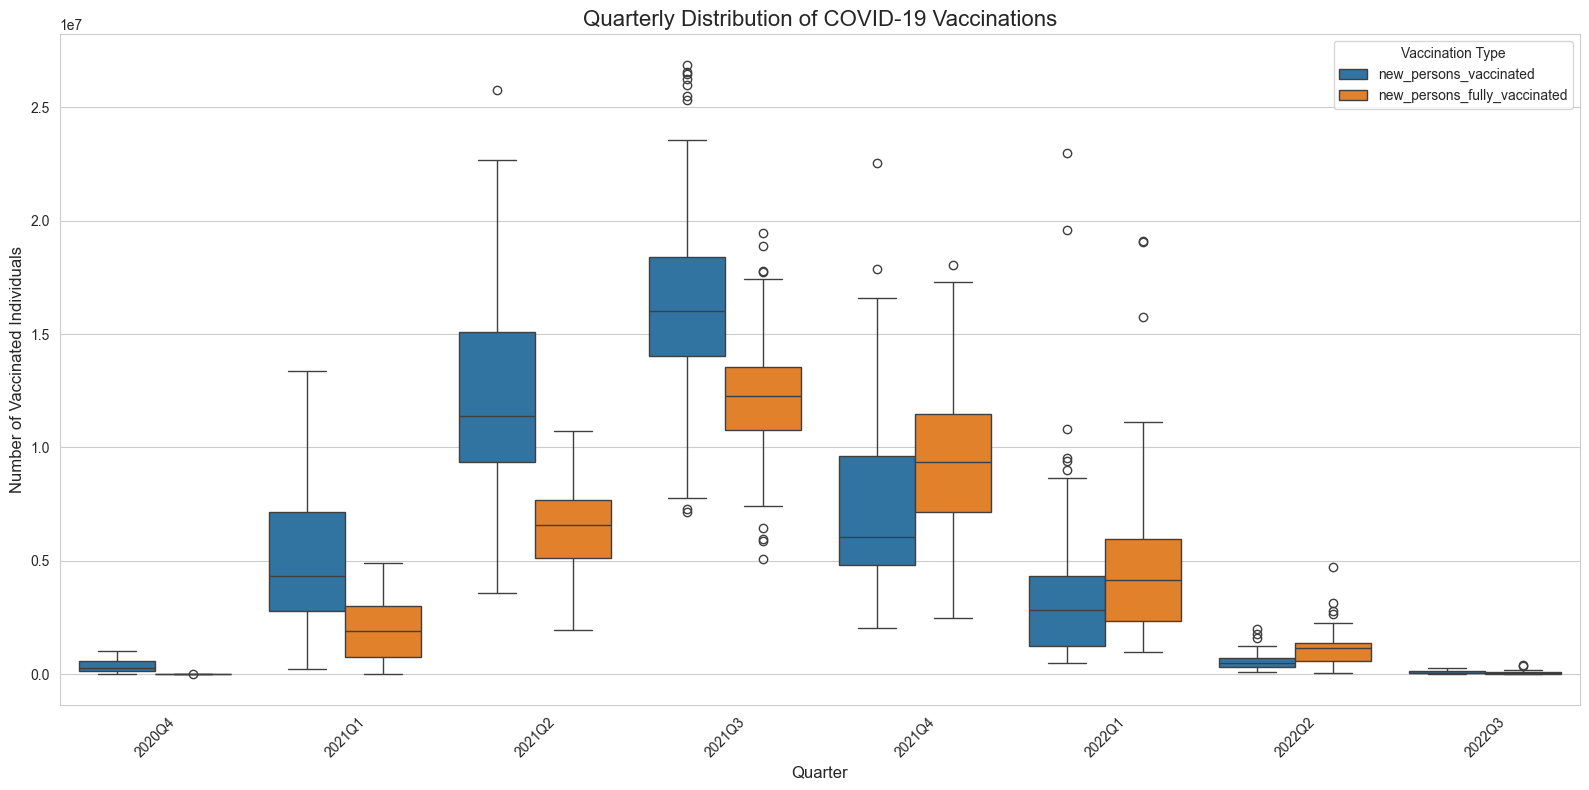

In [1838]:
vaccinated_df = df.groupby('date')['new_persons_vaccinated'].sum().reset_index()
fully_vaccinated_df = df.groupby('date')['new_persons_fully_vaccinated'].sum().reset_index()
vaccinated_merged_df = vaccinated_df.merge(fully_vaccinated_df, on='date')
vaccinated_merged_df['Q'] = vaccinated_merged_df['date'].dt.to_period('Q').astype(str)
vaccinated_melted_df = vaccinated_merged_df.melt(id_vars=['Q'], value_vars=['new_persons_vaccinated', 'new_persons_fully_vaccinated'], var_name='Category', value_name='Count')
vaccinated_melted_df
plt.figure(figsize=(16, 8))
sns.boxplot(x='Q', y='Count', hue='Category', data=vaccinated_melted_df)
plt.title('Quarterly Distribution of COVID-19 Vaccinations', fontsize=16)
plt.xlabel('Quarter', fontsize=12)
plt.ylabel('Number of Vaccinated Individuals', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Vaccination Type')
plt.tight_layout()
plt.show()

1.4. populacji



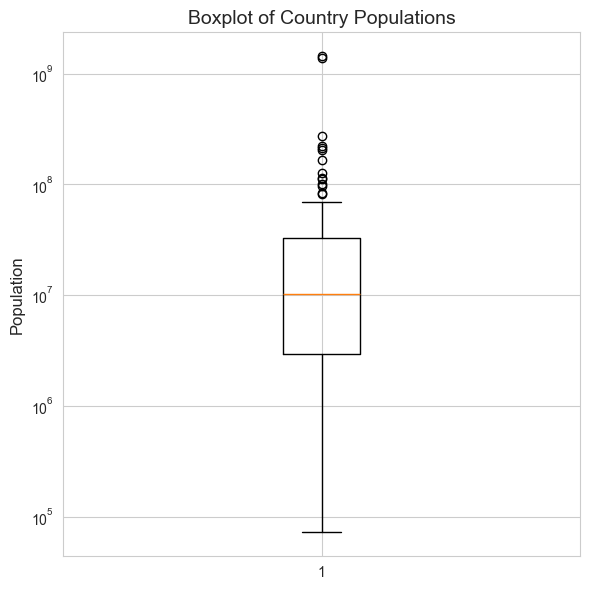

In [1839]:
plt.figure(figsize=(6, 6))
plt.boxplot(countries_df['population'])
plt.title('Boxplot of Country Populations', fontsize=14)
plt.ylabel('Population', fontsize=12)
plt.yscale('symlog')
plt.tight_layout()
plt.show()

1.5. PKB



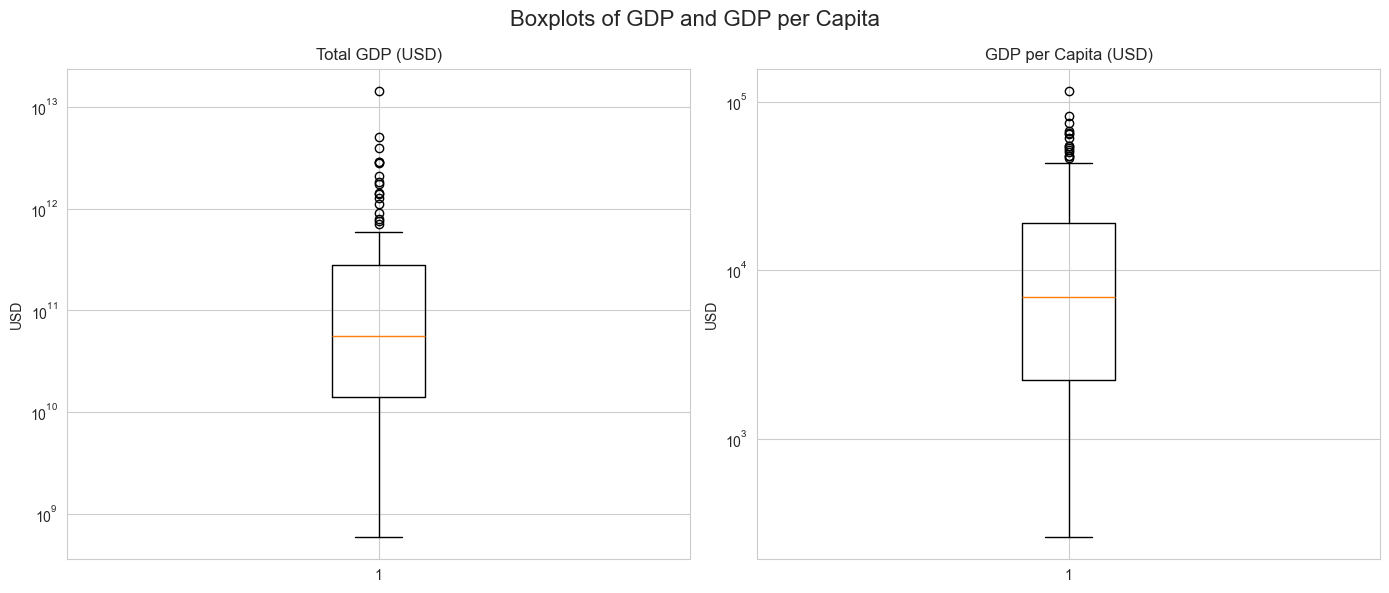

In [1840]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle('Boxplots of GDP and GDP per Capita', fontsize=16)
ax[0].boxplot(countries_df['gdp_usd'])
ax[0].set_title('Total GDP (USD)', fontsize=12)
ax[0].set_ylabel('USD', fontsize=10)
ax[0].set_yscale('log')
ax[1].boxplot(countries_df['gdp_per_capita_usd'])
ax[1].set_title('GDP per Capita (USD)', fontsize=12)
ax[1].set_ylabel('USD', fontsize=10)
ax[1].set_yscale('log')
plt.tight_layout()
plt.show()

1.6.1 Wydatki na służbę zdrowia

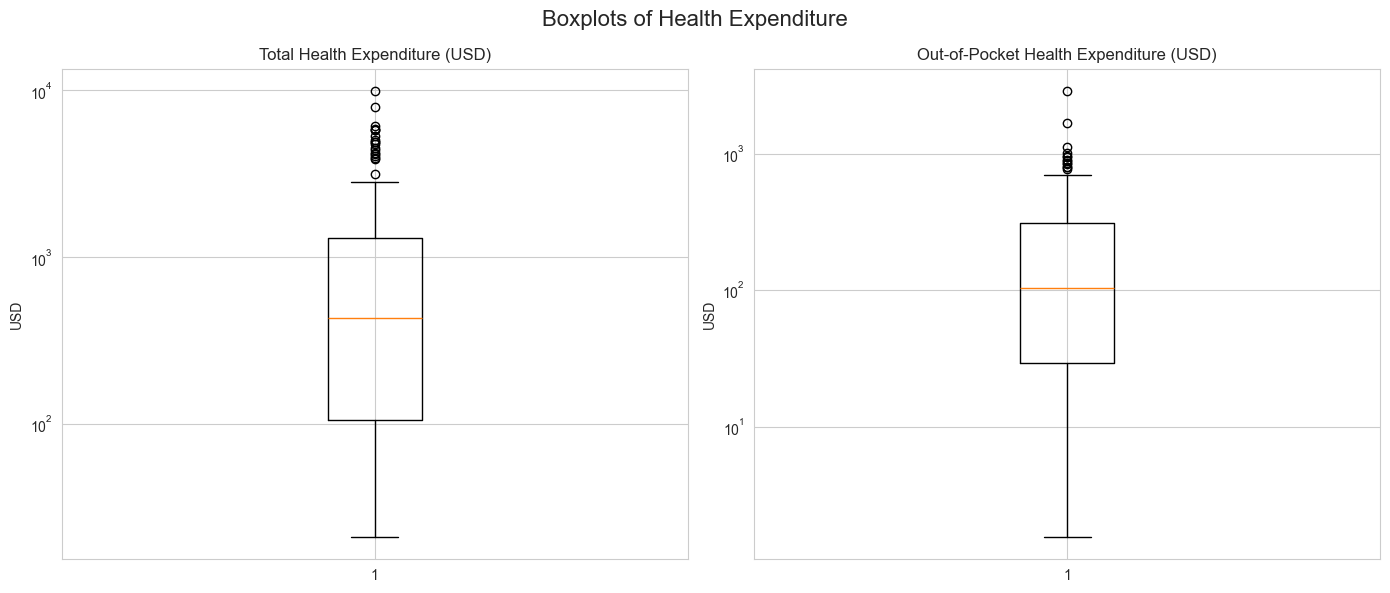

In [1841]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle('Boxplots of Health Expenditure', fontsize=16)

ax[0].boxplot(countries_df['health_expenditure_usd'])
ax[0].set_title('Total Health Expenditure (USD)', fontsize=12)
ax[0].set_ylabel('USD', fontsize=10)
ax[0].set_yscale('log')
ax[1].boxplot(countries_df['out_of_pocket_health_expenditure_usd'])
ax[1].set_title('Out-of-Pocket Health Expenditure (USD)', fontsize=12)
ax[1].set_ylabel('USD', fontsize=10)
ax[1].set_yscale('log')

plt.tight_layout()
plt.show()

1.6.2 Zaaplikowane dawki szczepionek

D:\DevTools\Python\Python312\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


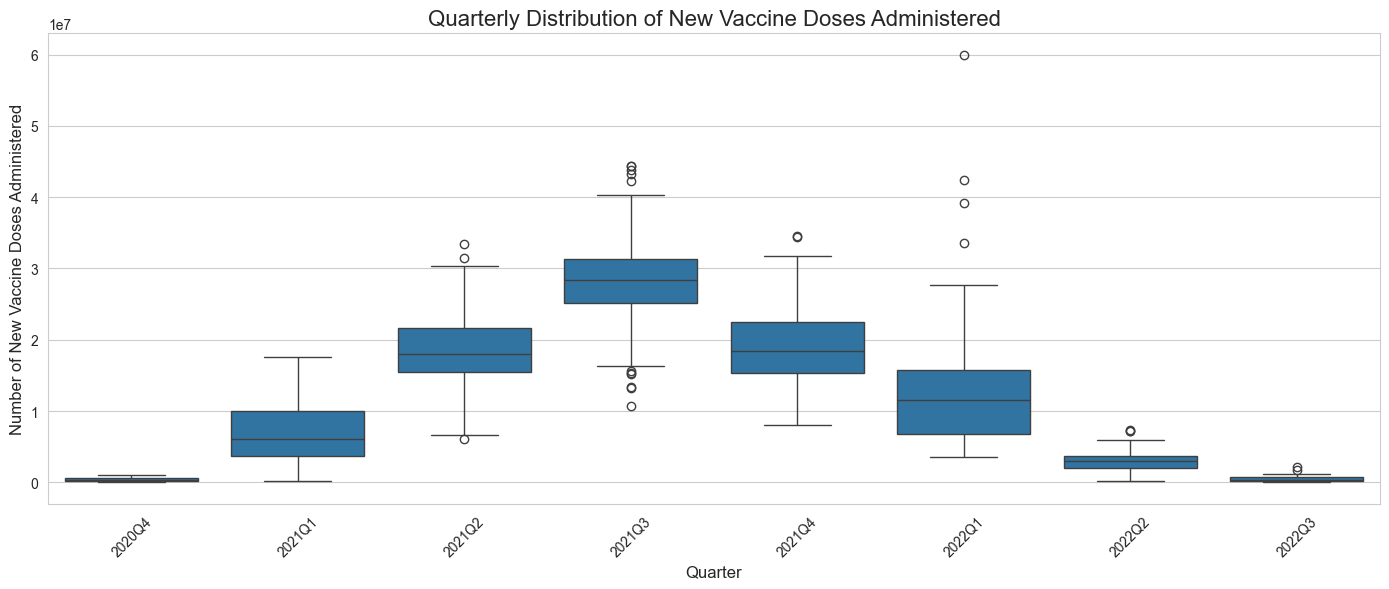

In [1842]:
plt.figure(figsize=(14, 6))
administered_df = df.groupby('date')['new_vaccine_doses_administered'].sum().reset_index()
administered_df['Q'] = administered_df['date'].dt.to_period('Q').astype(str)
sns.boxplot(x='Q', y='new_vaccine_doses_administered', data=administered_df)
plt.title('Quarterly Distribution of New Vaccine Doses Administered', fontsize=16)
plt.xlabel('Quarter', fontsize=12)
plt.ylabel('Number of New Vaccine Doses Administered', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

1.6.3 liczba nowych osób przetestowanych

D:\DevTools\Python\Python312\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


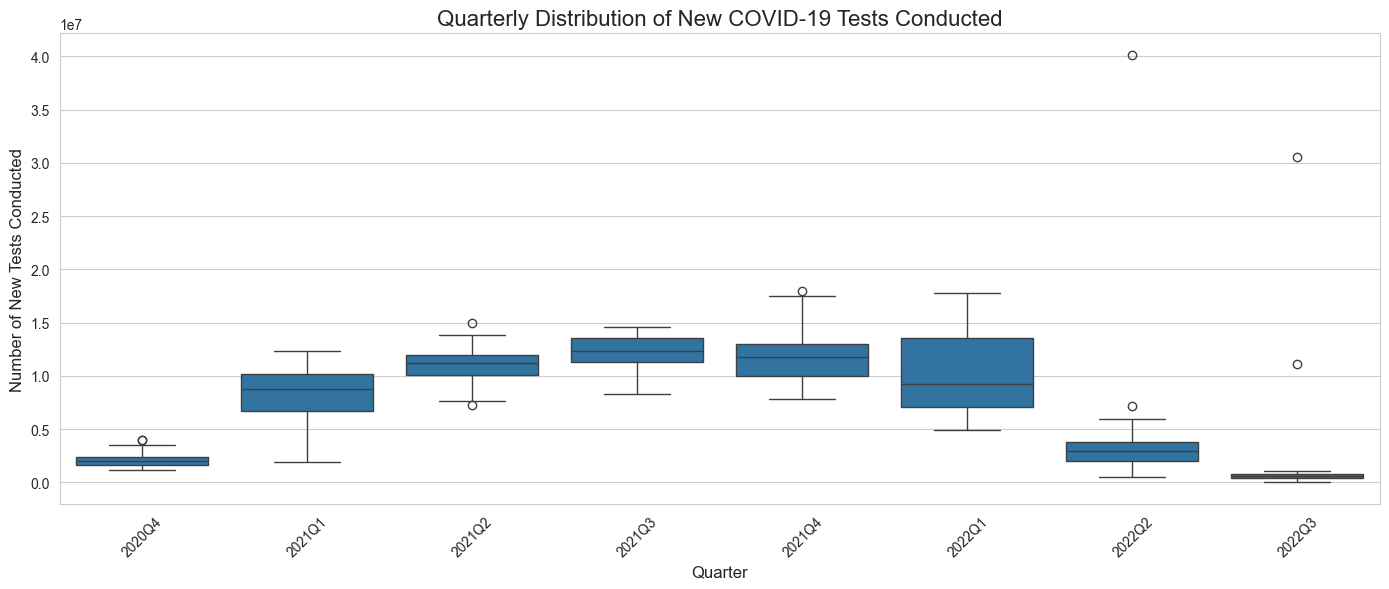

In [1843]:
plt.figure(figsize=(14, 6))
tested_df = df.groupby('date')['new_tested'].sum().reset_index()
tested_df['Q'] = tested_df['date'].dt.to_period('Q').astype(str)
sns.boxplot(x='Q', y='new_tested', data=tested_df)
plt.title('Quarterly Distribution of New COVID-19 Tests Conducted', fontsize=16)
plt.xlabel('Quarter', fontsize=12)
plt.ylabel('Number of New Tests Conducted', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

1.6.4 Gęstość zaludnienia

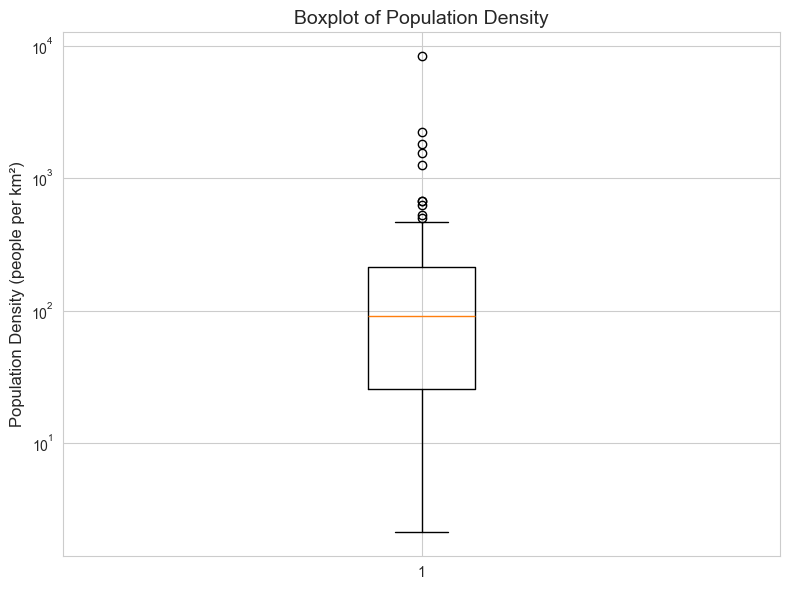

In [1844]:
plt.figure(figsize=(8, 6))
plt.boxplot(countries_df['population_density_x'])
plt.title('Boxplot of Population Density', fontsize=14)
plt.ylabel('Population Density (people per km²)', fontsize=12)
plt.yscale('log')
plt.tight_layout()
plt.show()

## Część 2

Metoda Z-score i IQR dla vaccine doses administered

D:\DevTools\Python\Python312\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


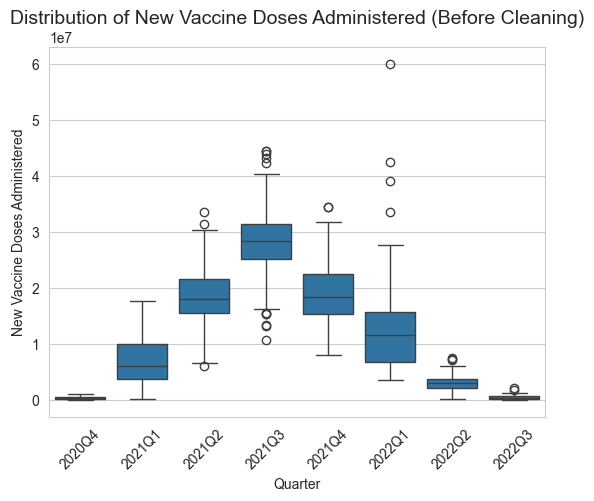

Metoda z-score usunela 3022 rekordow


D:\DevTools\Python\Python312\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


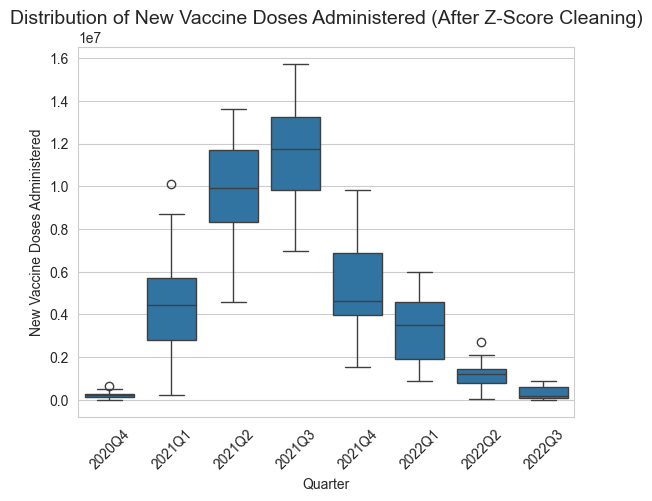

Metoda IQR usunela 63960 rekordow


D:\DevTools\Python\Python312\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


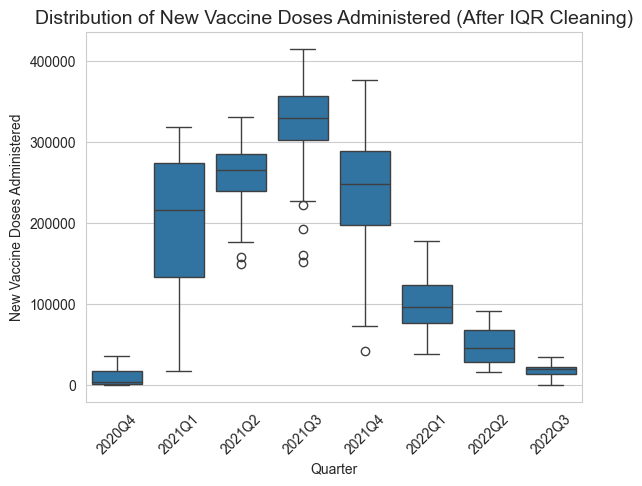

In [1845]:
from scipy.stats import zscore


# bez czyszczenia
administered_df = df.groupby('date')['new_vaccine_doses_administered'].sum().reset_index()
administered_df['Q'] = administered_df['date'].dt.to_period('Q').astype(str)
sns.boxplot(x='Q', y='new_vaccine_doses_administered', data=administered_df)
plt.title('Distribution of New Vaccine Doses Administered (Before Cleaning)', fontsize=14)
plt.xlabel('Quarter')
plt.ylabel('New Vaccine Doses Administered')
plt.xticks(rotation=45)
plt.show()

#zscore

threshold = 2
cleaned_vaccine_doses_administered_zscore_df = df

cleaned_vaccine_doses_administered_zscore_df['z-score'] = zscore(cleaned_vaccine_doses_administered_zscore_df['new_vaccine_doses_administered'])
cleaned_vaccine_doses_administered_zscore_df = cleaned_vaccine_doses_administered_zscore_df[cleaned_vaccine_doses_administered_zscore_df['z-score'] <= threshold]
print("Metoda z-score usunela", df.shape[0] - cleaned_vaccine_doses_administered_zscore_df.shape[0], "rekordow")
cleaned_vaccine_doses_administered_zscore_df = cleaned_vaccine_doses_administered_zscore_df.groupby('date')['new_vaccine_doses_administered'].sum().reset_index()
cleaned_vaccine_doses_administered_zscore_df['Q'] = cleaned_vaccine_doses_administered_zscore_df['date'].dt.to_period('Q').astype(str)
sns.boxplot(x='Q', y='new_vaccine_doses_administered', data=cleaned_vaccine_doses_administered_zscore_df)
plt.title('Distribution of New Vaccine Doses Administered (After Z-Score Cleaning)', fontsize=14)
plt.xlabel('Quarter')
plt.ylabel('New Vaccine Doses Administered')
plt.xticks(rotation=45)
plt.show()
# IQR

Q1 = df['new_vaccine_doses_administered'].quantile(0.25)
Q3 = df['new_vaccine_doses_administered'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
cleaned_vaccine_doses_administered_iqr_df = df[(df['new_vaccine_doses_administered'] >= lower_bound) & (df['new_vaccine_doses_administered'] <= upper_bound)]
print("Metoda IQR usunela", df.shape[0] - cleaned_vaccine_doses_administered_iqr_df.shape[0], "rekordow")
cleaned_vaccine_doses_administered_iqr_df = cleaned_vaccine_doses_administered_iqr_df.groupby('date')['new_vaccine_doses_administered'].sum().reset_index()
cleaned_vaccine_doses_administered_iqr_df['Q'] = cleaned_vaccine_doses_administered_iqr_df['date'].dt.to_period('Q').astype(str)
sns.boxplot(x='Q', y='new_vaccine_doses_administered', data=cleaned_vaccine_doses_administered_iqr_df)
plt.title('Distribution of New Vaccine Doses Administered (After IQR Cleaning)', fontsize=14)
plt.xlabel('Quarter')
plt.ylabel('New Vaccine Doses Administered')
plt.xticks(rotation=45)
plt.show()

Metoda Z-score i IQR dla new confirmed

D:\DevTools\Python\Python312\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


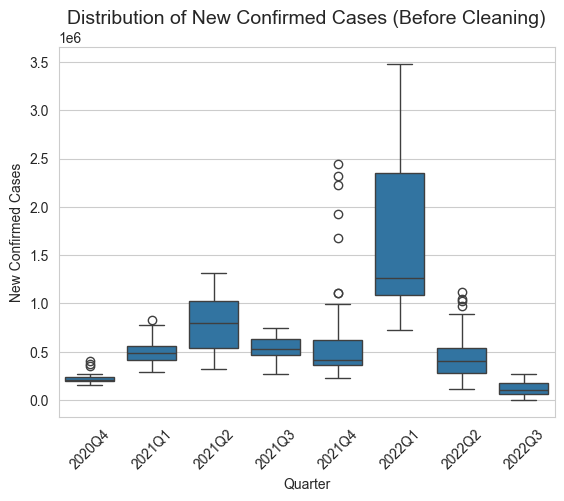

Metoda z-score usunela 3454 rekordow


D:\DevTools\Python\Python312\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


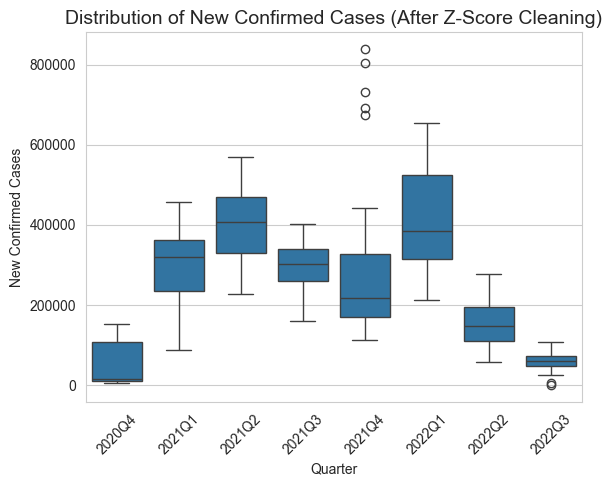

Metoda IQR usunela 59277 rekordow


D:\DevTools\Python\Python312\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


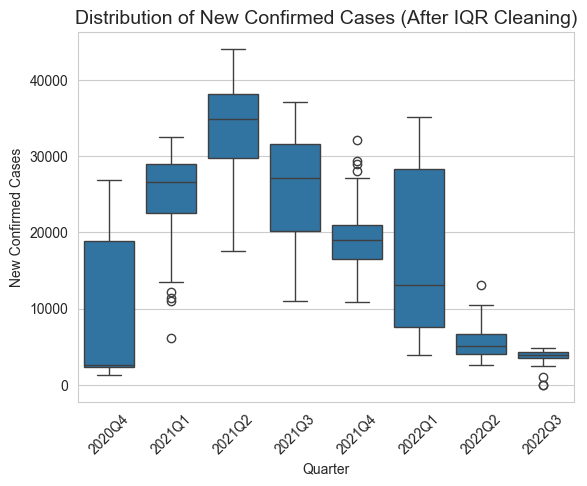

In [1846]:
from scipy.stats import zscore


# bez czyszczenia
administered_df = df.groupby('date')['new_confirmed'].sum().reset_index()
administered_df['Q'] = administered_df['date'].dt.to_period('Q').astype(str)
sns.boxplot(x='Q', y='new_confirmed', data=administered_df)
plt.title('Distribution of New Confirmed Cases (Before Cleaning)', fontsize=14)
plt.xlabel('Quarter')
plt.ylabel('New Confirmed Cases')
plt.xticks(rotation=45)
plt.show()

#zscore

threshold = 2
cleaned_new_confirmed_zscore_df = df

cleaned_new_confirmed_zscore_df['z-score'] = zscore(cleaned_new_confirmed_zscore_df['new_confirmed'])
cleaned_new_confirmed_zscore_df = cleaned_new_confirmed_zscore_df[cleaned_new_confirmed_zscore_df['z-score'] <= threshold]
print("Metoda z-score usunela", df.shape[0] - cleaned_new_confirmed_zscore_df.shape[0], "rekordow")
cleaned_new_confirmed_zscore_df = cleaned_new_confirmed_zscore_df.groupby('date')['new_confirmed'].sum().reset_index()
cleaned_new_confirmed_zscore_df['Q'] = cleaned_new_confirmed_zscore_df['date'].dt.to_period('Q').astype(str)
sns.boxplot(x='Q', y='new_confirmed', data=cleaned_new_confirmed_zscore_df)
plt.title('Distribution of New Confirmed Cases (After Z-Score Cleaning)', fontsize=14)
plt.xlabel('Quarter')
plt.ylabel('New Confirmed Cases')
plt.xticks(rotation=45)
plt.show()
# IQR

Q1 = df['new_confirmed'].quantile(0.25)
Q3 = df['new_confirmed'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
cleaned_new_confirmed_iqr_df = df[(df['new_confirmed'] >= lower_bound) & (df['new_confirmed'] <= upper_bound)]
print("Metoda IQR usunela", df.shape[0] - cleaned_new_confirmed_iqr_df.shape[0], "rekordow")
cleaned_new_confirmed_iqr_df = cleaned_new_confirmed_iqr_df.groupby('date')['new_confirmed'].sum().reset_index()
cleaned_new_confirmed_iqr_df['Q'] = cleaned_new_confirmed_iqr_df['date'].dt.to_period('Q').astype(str)
sns.boxplot(x='Q', y='new_confirmed', data=cleaned_new_confirmed_iqr_df)
plt.title('Distribution of New Confirmed Cases (After IQR Cleaning)', fontsize=14)
plt.xlabel('Quarter')
plt.ylabel('New Confirmed Cases')
plt.xticks(rotation=45)
plt.show()

## Część 3

3.1. średnia liczba nowych zachorowań, śmierci i szczepień dla co najmniej 10 wybranych krajów w wybranym miesiącu

In [1847]:
month = 5
year = 2021

countries = ['Australia', 'Poland', 'United States of America', 'Belgium', 'Canada', 'Brazil', 'Japan', 'India', 'Azerbaijan', 'Morocco'] # ...
filtered_df = df[
    (df['date'].dt.year == year) &
    (df['date'].dt.month == month) &
    (df['subregion1_code_x'].isna()) &
    (df['country_name'].isin(countries))
]
aggregated_df = filtered_df.groupby(['country_name'])[['new_confirmed', 'new_deceased', 'new_persons_vaccinated', 'new_persons_fully_vaccinated']].mean()
aggregated_df

,new_confirmed,new_deceased,new_persons_vaccinated,new_persons_fully_vaccinated
country_name,,,,
Australia,9.620690,0.000000,6.170855e+04,5.526655e+03
Azerbaijan,416.000000,11.555556,1.371930e+04,1.249430e+04
Belgium,2235.483871,22.322581,5.057097e+04,4.137661e+04
Brazil,60856.225806,1903.548387,4.872036e+05,2.131256e+05
Canada,4.741935,48.741935,5.956704e+05,6.368810e+04
India,284450.500000,3835.142857,1.425402e+06,5.691405e+05
Japan,4957.225806,90.935484,3.071305e+05,9.782477e+04
Morocco,301.200000,4.200000,1.810145e+05,6.040290e+04
Poland,3369.250000,309.250000,2.437248e+05,1.759185e+05


C:\Users\PTR\AppData\Local\Temp\ipykernel_86152\4087421325.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='country_name', y='new_confirmed', data=aggregated_df.reset_index(), ax=ax[0, 0], palette='Blues')
D:\DevTools\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
D:\DevTools\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
D:\DevTools

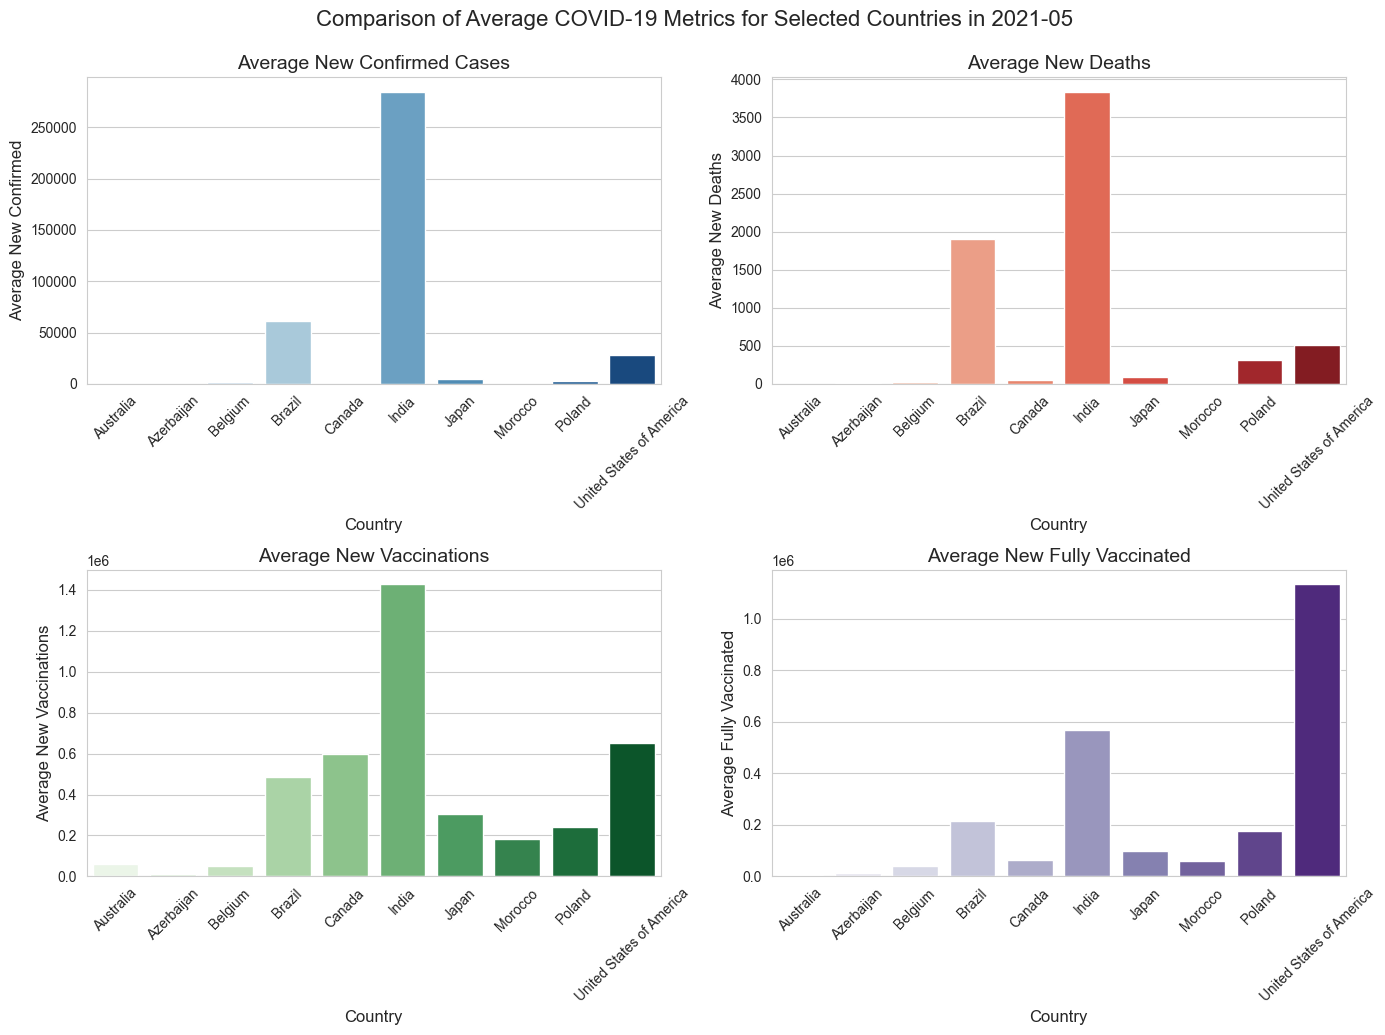

In [1848]:
# Wykresy porównawcze
fig, ax = plt.subplots(2, 2, figsize=(14, 10))

# Wykres 1: new_confirmed
sns.barplot(x='country_name', y='new_confirmed', data=aggregated_df.reset_index(), ax=ax[0, 0], palette='Blues')
ax[0, 0].set_title('Average New Confirmed Cases', fontsize=14)
ax[0, 0].set_ylabel('Average New Confirmed', fontsize=12)
ax[0, 0].set_xlabel('Country', fontsize=12)
ax[0, 0].tick_params(axis='x', rotation=45)

# Wykres 2: new_deceased
sns.barplot(x='country_name', y='new_deceased', data=aggregated_df.reset_index(), ax=ax[0, 1], palette='Reds')
ax[0, 1].set_title('Average New Deaths', fontsize=14)
ax[0, 1].set_ylabel('Average New Deaths', fontsize=12)
ax[0, 1].set_xlabel('Country', fontsize=12)
ax[0, 1].tick_params(axis='x', rotation=45)

# Wykres 3: new_persons_vaccinated
sns.barplot(x='country_name', y='new_persons_vaccinated', data=aggregated_df.reset_index(), ax=ax[1, 0], palette='Greens')
ax[1, 0].set_title('Average New Vaccinations', fontsize=14)
ax[1, 0].set_ylabel('Average New Vaccinations', fontsize=12)
ax[1, 0].set_xlabel('Country', fontsize=12)
ax[1, 0].tick_params(axis='x', rotation=45)

# Wykres 4: new_persons_fully_vaccinated
sns.barplot(x='country_name', y='new_persons_fully_vaccinated', data=aggregated_df.reset_index(), ax=ax[1, 1], palette='Purples')
ax[1, 1].set_title('Average New Fully Vaccinated', fontsize=14)
ax[1, 1].set_ylabel('Average Fully Vaccinated', fontsize=12)
ax[1, 1].set_xlabel('Country', fontsize=12)
ax[1, 1].tick_params(axis='x', rotation=45)

# Dostosowanie układu
plt.tight_layout()
plt.suptitle(f'Comparison of Average COVID-19 Metrics for Selected Countries in {year}-{month:02d}', fontsize=16, y=1.03)
plt.show()

3.2. średnia zmiana liczby zachorowań, śmierci i szczepień dla co najmniej 10 wybranych krajów w wybranym miesiącu,

In [1849]:
avg_diff = df[
        (df['date'].dt.year == year) & 
        (df['date'].dt.month == month) &
        (df['subregion1_code_x'].isna()) &
        (df['country_name'].isin(countries))
    ].groupby(['country_name'])[['new_confirmed', 'new_deceased', 'new_persons_vaccinated']].diff()
avg_diff = avg_diff.groupby(df['country_name']).mean()
avg_diff.reset_index(inplace=True)
avg_diff

# a tez nw

,country_name,new_confirmed,new_deceased,new_persons_vaccinated
0,Australia,0.071429,0.000000,1661.142857
1,Azerbaijan,10.461538,0.076923,39.269231
2,Belgium,-64.566667,-0.200000,491.133333
3,Brazil,-818.933333,-49.400000,-5471.066667
4,Canada,0.133333,0.000000,-5219.800000
5,India,7028.888889,12.592593,4384.259259
6,Japan,56.233333,-0.733333,-8206.633333
7,Morocco,1.315789,-0.210526,12317.000000
8,Poland,285.333333,38.333333,25035.000000
9,United States of America,-593.689655,-5.034483,-9069.517241


C:\Users\PTR\AppData\Local\Temp\ipykernel_86152\3469994839.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='country_name', y='new_confirmed', data=avg_diff, palette='Blues', ax=ax[0])
D:\DevTools\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
D:\DevTools\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
D:\DevTools\Python\Python312\Lib\

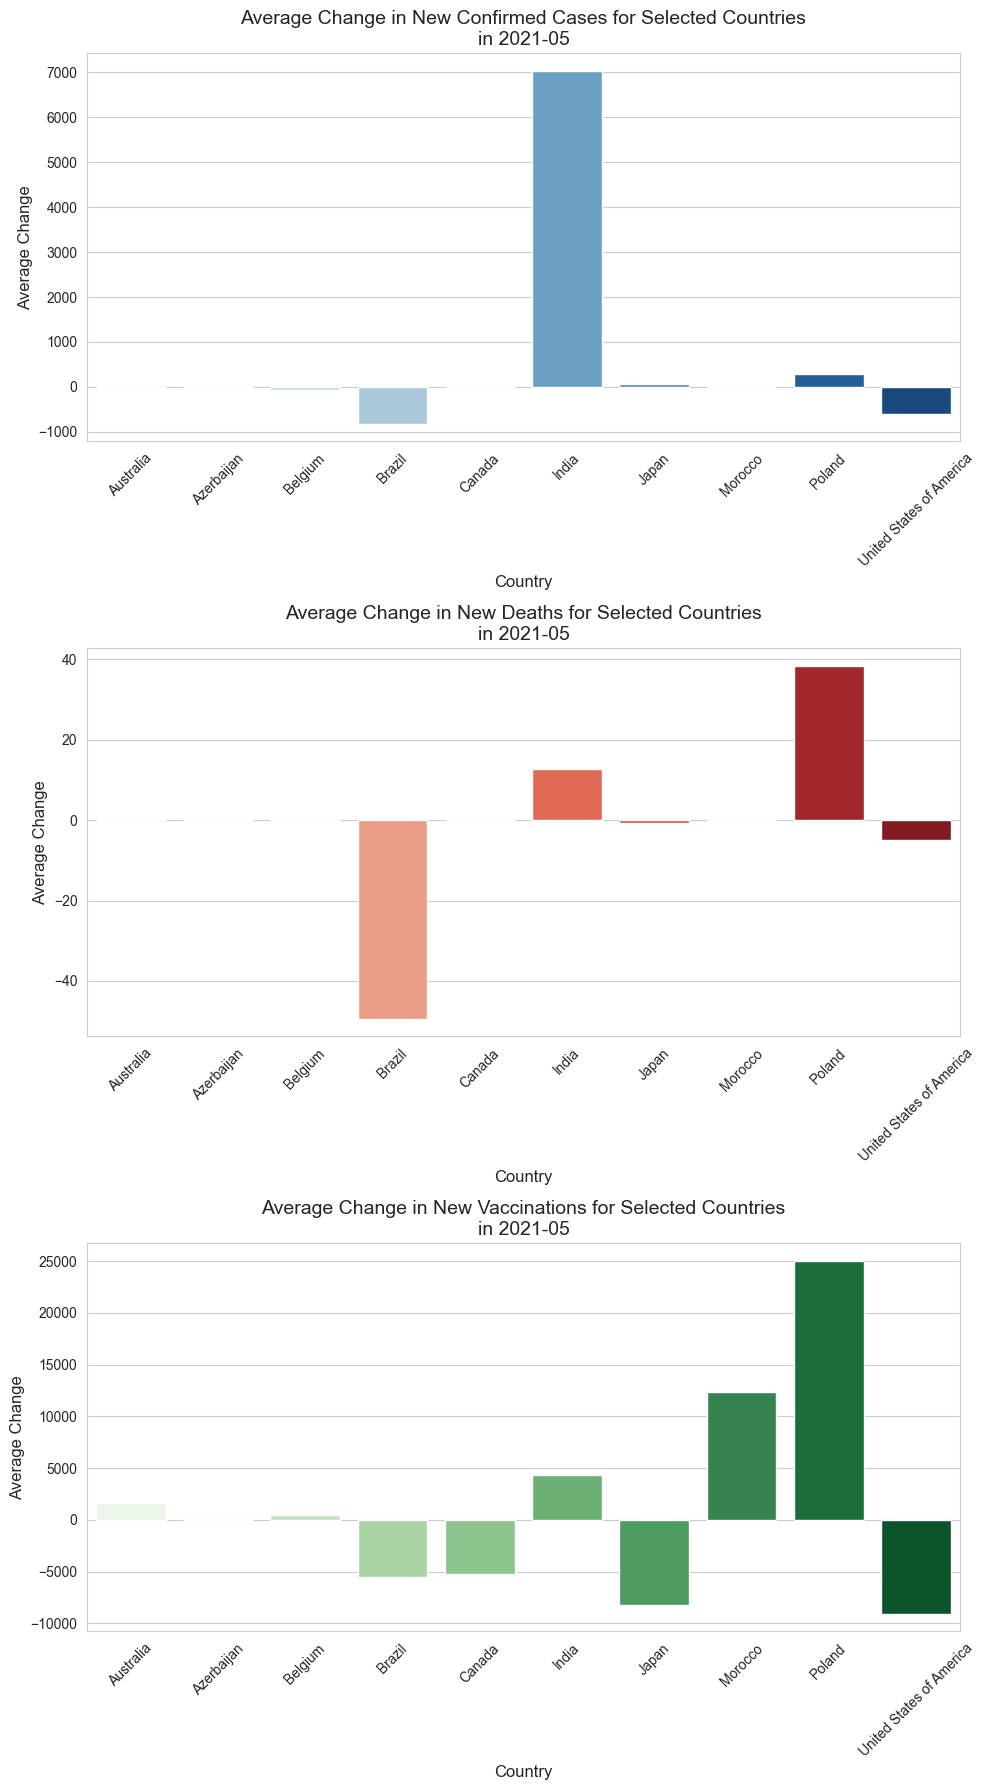

In [1850]:
fig, ax = plt.subplots(3, 1, figsize=(10, 18))

sns.barplot(x='country_name', y='new_confirmed', data=avg_diff, palette='Blues', ax=ax[0])
ax[0].set_title(f'Average Change in New Confirmed Cases for Selected Countries\nin {year}-{month:02d}', fontsize=14)
ax[0].set_xlabel('Country', fontsize=12)
ax[0].set_ylabel('Average Change', fontsize=12)
ax[0].tick_params(axis='x', rotation=45)

sns.barplot(x='country_name', y='new_deceased', data=avg_diff, palette='Reds', ax=ax[1])
ax[1].set_title(f'Average Change in New Deaths for Selected Countries\nin {year}-{month:02d}', fontsize=14)
ax[1].set_xlabel('Country', fontsize=12)
ax[1].set_ylabel('Average Change', fontsize=12)
ax[1].tick_params(axis='x', rotation=45)

sns.barplot(x='country_name', y='new_persons_vaccinated', data=avg_diff, palette='Greens', ax=ax[2])
ax[2].set_title(f'Average Change in New Vaccinations for Selected Countries\nin {year}-{month:02d}', fontsize=14)
ax[2].set_xlabel('Country', fontsize=12)
ax[2].set_ylabel('Average Change', fontsize=12)
ax[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

3.3. mediana liczby nowych zachorowań, śmierci i szczepień dla co najmniej 10 wybranych krajów w wybranym miesiącu,


In [1851]:
median_values = df[
    (df['date'].dt.year == year) & 
    (df['date'].dt.month == month) & 
    (df['subregion1_code_x'].isna()) & 
    (df['country_name'].isin(countries))
].groupby(['country_name'])[['new_confirmed', 'new_deceased', 'new_persons_vaccinated', 'new_persons_fully_vaccinated']].median()

# Resetowanie indeksu dla łatwiejszego przetwarzania
median_values.reset_index(inplace=True)
median_values

,country_name,new_confirmed,new_deceased,new_persons_vaccinated,new_persons_fully_vaccinated
0,Australia,9.0,0.0,73133.0,3246.0
1,Azerbaijan,371.0,12.0,5391.0,11600.0
2,Belgium,2409.0,19.0,53145.0,40610.0
3,Brazil,72715.0,2202.0,568106.0,230915.0
4,Canada,5.0,0.0,326726.0,28245.0
5,India,293640.0,3883.0,1265122.5,341732.5
6,Japan,5032.0,91.0,288041.0,67810.0
7,Morocco,323.5,4.5,172435.5,33285.0
8,Poland,2908.0,296.0,256736.5,183919.5
9,United States of America,27467.5,529.5,661181.5,1111411.5


C:\Users\PTR\AppData\Local\Temp\ipykernel_86152\817604789.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='country_name', y='new_confirmed', data=median_values, palette='Blues', ax=ax[0])
D:\DevTools\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
D:\DevTools\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
D:\DevTools\Python\Python312\

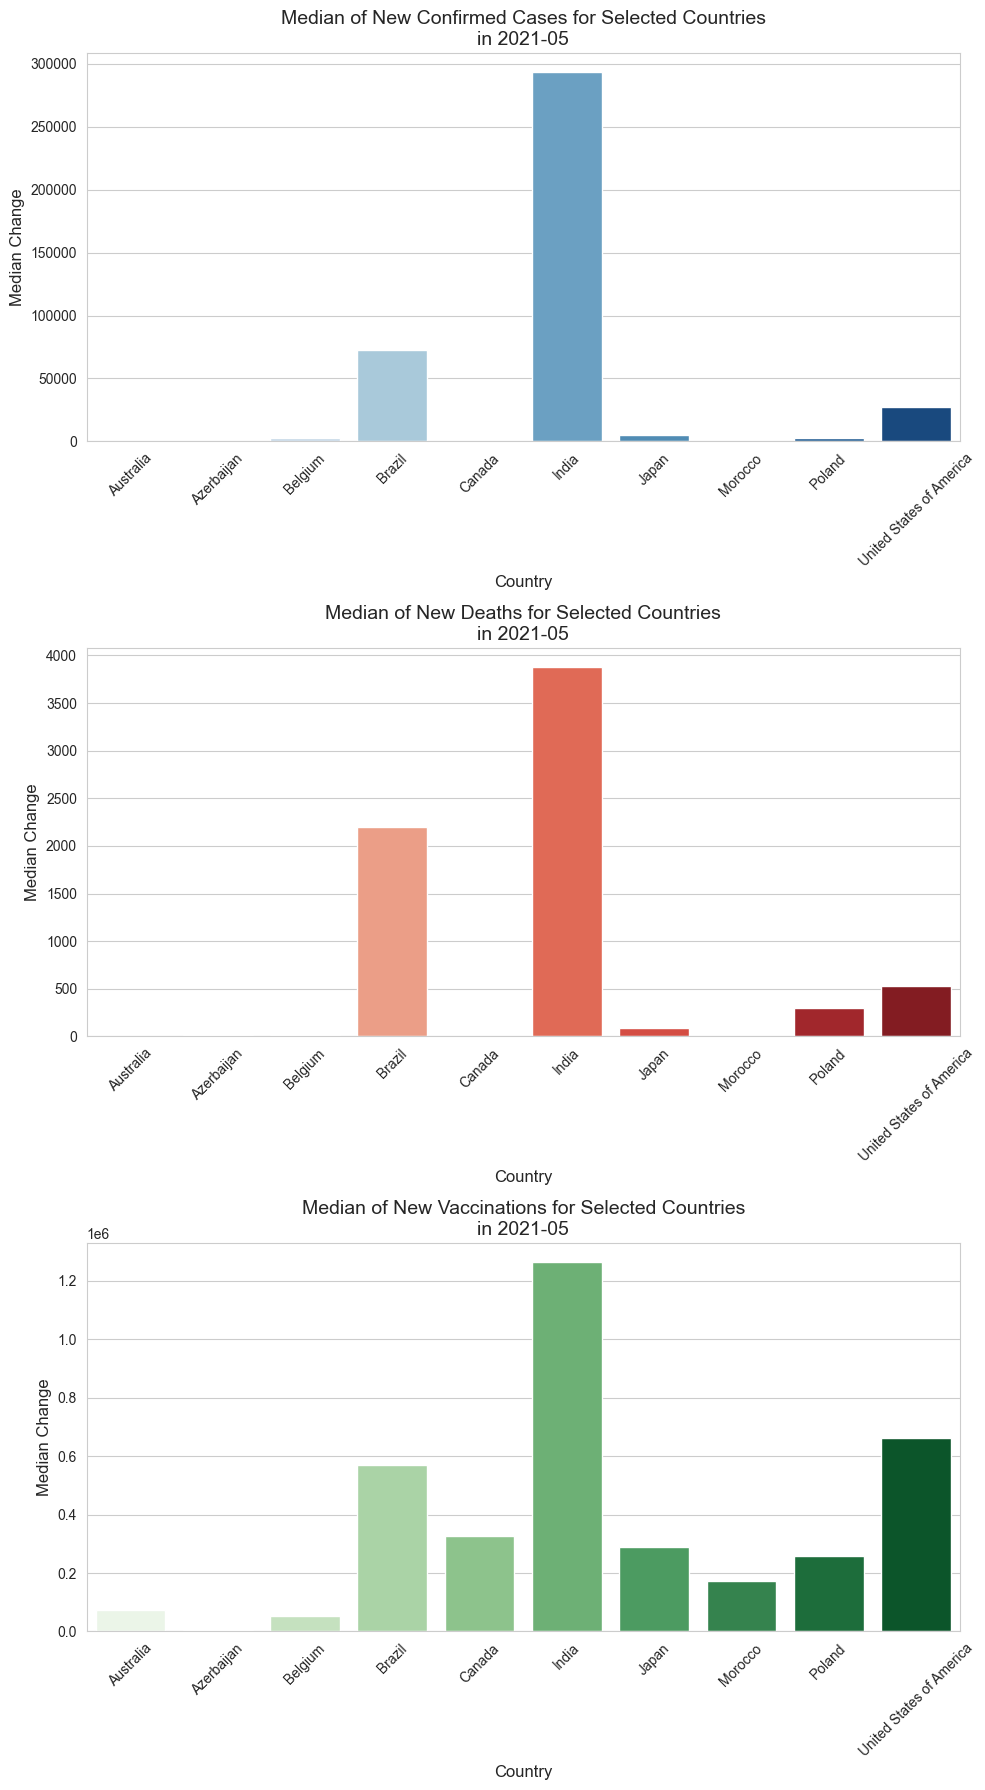

In [1852]:
fig, ax = plt.subplots(3, 1, figsize=(10, 18))

sns.barplot(x='country_name', y='new_confirmed', data=median_values, palette='Blues', ax=ax[0])
ax[0].set_title(f'Median of New Confirmed Cases for Selected Countries\nin {year}-{month:02d}', fontsize=14)
ax[0].set_xlabel('Country', fontsize=12)
ax[0].set_ylabel('Median Change', fontsize=12)
ax[0].tick_params(axis='x', rotation=45)

sns.barplot(x='country_name', y='new_deceased', data=median_values, palette='Reds', ax=ax[1])
ax[1].set_title(f'Median of New Deaths for Selected Countries\nin {year}-{month:02d}', fontsize=14)
ax[1].set_xlabel('Country', fontsize=12)
ax[1].set_ylabel('Median Change', fontsize=12)
ax[1].tick_params(axis='x', rotation=45)

sns.barplot(x='country_name', y='new_persons_vaccinated', data=median_values, palette='Greens', ax=ax[2])
ax[2].set_title(f'Median of New Vaccinations for Selected Countries\nin {year}-{month:02d}', fontsize=14)
ax[2].set_xlabel('Country', fontsize=12)
ax[2].set_ylabel('Median Change', fontsize=12)
ax[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

3.4. odchylenie standardowe liczby nowych zachorowań, śmierci i szczepień dla co najmniej 10 wybranych krajów w wybranym miesiącu,


In [1853]:
std_values = df[
    (df['date'].dt.year == year) & 
    (df['date'].dt.month == month) & 
    (df['subregion1_code_x'].isna()) & 
    (df['country_name'].isin(countries))
].groupby(['country_name'])[['new_confirmed', 'new_deceased', 'new_persons_vaccinated', 'new_persons_fully_vaccinated']].std()
std_values.reset_index(inplace=True)
std_values

,country_name,new_confirmed,new_deceased,new_persons_vaccinated,new_persons_fully_vaccinated
0,Australia,4.601349,0.000000,30254.816963,9966.067057
1,Azerbaijan,278.332673,5.337338,14591.138145,7816.850452
2,Belgium,1081.293018,9.961215,28056.674786,31940.771523
3,Brazil,20478.573226,719.123858,224685.758795,111863.270131
4,Canada,4.389136,113.495071,677343.717999,88551.421468
5,India,92916.991458,403.585295,714035.145951,474647.278726
6,Japan,1356.244882,35.363763,212944.429938,85824.972407
7,Morocco,84.333673,2.307881,122851.470062,101595.683334
8,Poland,2289.656070,158.373767,40317.753950,37799.045354
9,United States of America,10097.384176,150.914717,256652.610181,608881.191458


C:\Users\PTR\AppData\Local\Temp\ipykernel_86152\853343290.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='country_name', y='new_confirmed', data=std_values, palette='Blues', ax=ax[0])
D:\DevTools\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
D:\DevTools\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
D:\DevTools\Python\Python312\Lib

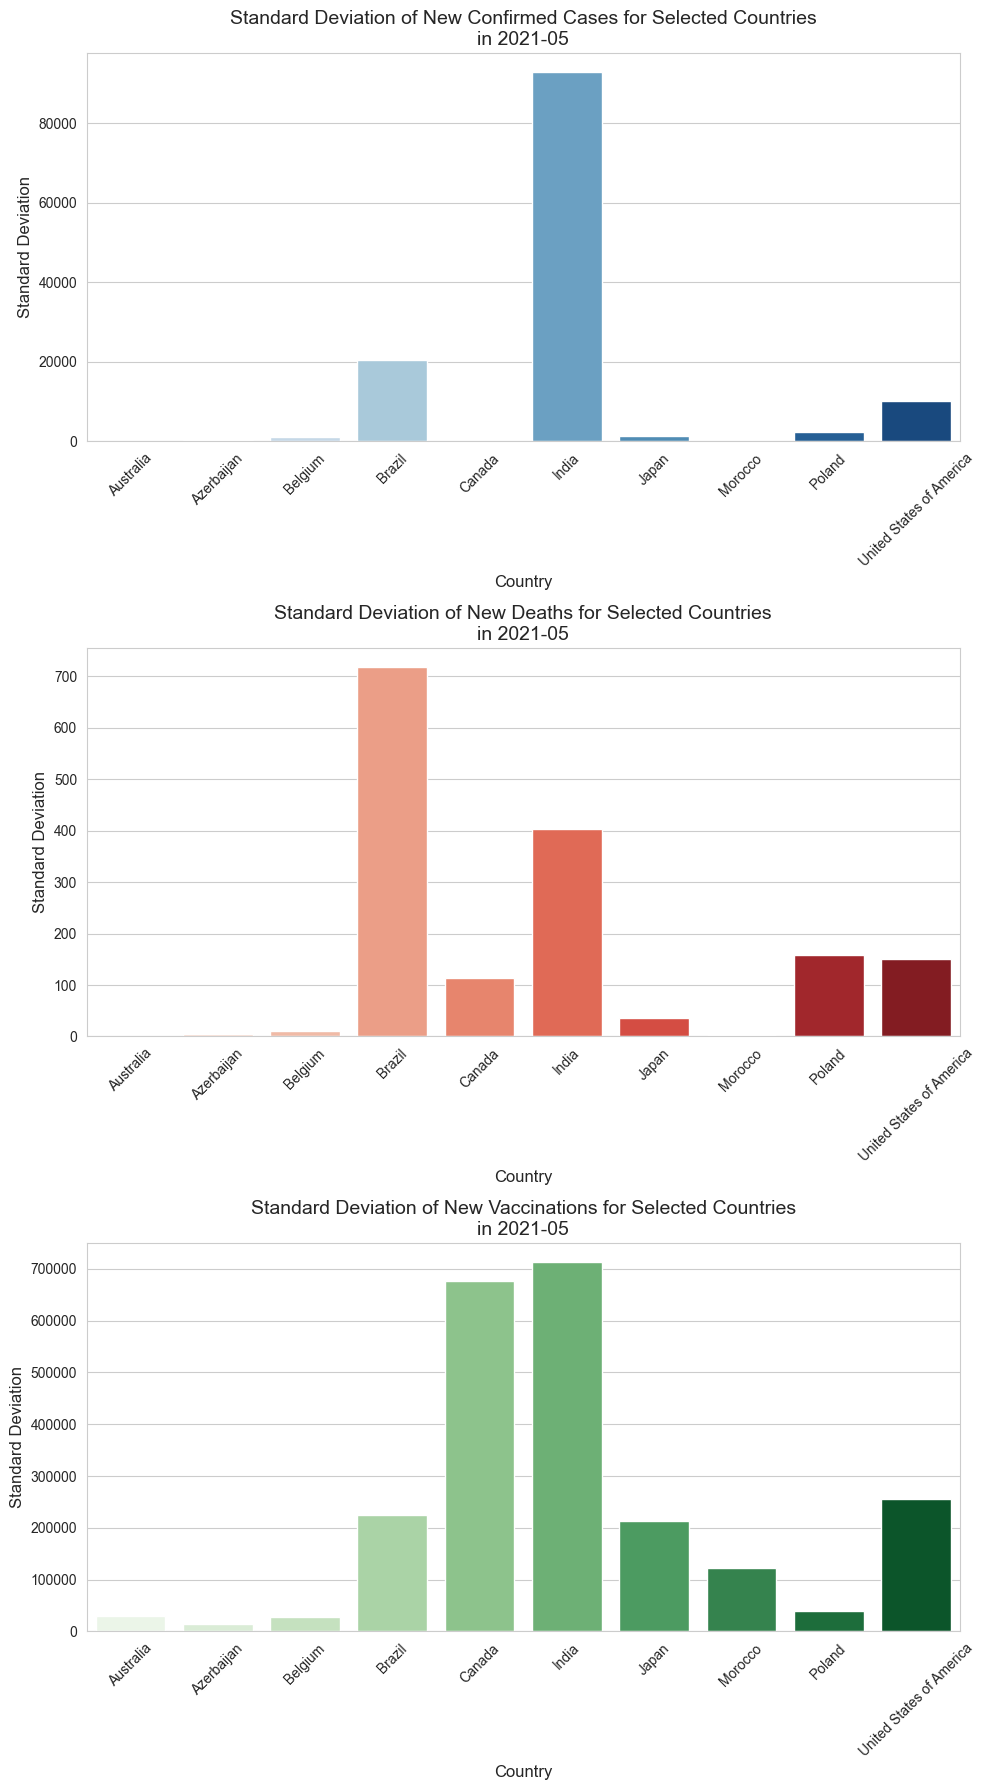

In [1854]:
fig, ax = plt.subplots(3, 1, figsize=(10, 18))

sns.barplot(x='country_name', y='new_confirmed', data=std_values, palette='Blues', ax=ax[0])
ax[0].set_title(f'Standard Deviation of New Confirmed Cases for Selected Countries\nin {year}-{month:02d}', fontsize=14)
ax[0].set_xlabel('Country', fontsize=12)
ax[0].set_ylabel('Standard Deviation', fontsize=12)
ax[0].tick_params(axis='x', rotation=45)

sns.barplot(x='country_name', y='new_deceased', data=std_values, palette='Reds', ax=ax[1])
ax[1].set_title(f'Standard Deviation of New Deaths for Selected Countries\nin {year}-{month:02d}', fontsize=14)
ax[1].set_xlabel('Country', fontsize=12)
ax[1].set_ylabel('Standard Deviation', fontsize=12)
ax[1].tick_params(axis='x', rotation=45)

sns.barplot(x='country_name', y='new_persons_vaccinated', data=std_values, palette='Greens', ax=ax[2])
ax[2].set_title(f'Standard Deviation of New Vaccinations for Selected Countries\nin {year}-{month:02d}', fontsize=14)
ax[2].set_xlabel('Country', fontsize=12)
ax[2].set_ylabel('Standard Deviation', fontsize=12)
ax[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

3.5. minimalna, średnia i maksymalna liczba nowych zachorowań, szczepień i śmierci, a PKB co najmniej 10 wybranych krajów,

In [1855]:
df = pd.read_csv('covid_combined_data.csv')
df['date'] = pd.to_datetime(df['date'])
df = df[(df['date'].dt.year == year) & 
        (df['date'].dt.month == month) &
        (df['subregion1_code_x'].isna()) &
        (df['country_name'].isin(countries))]

min_values = df.groupby(['country_name']).agg({'new_confirmed': 'min', 'new_persons_vaccinated': 'min', 'new_deceased': 'min'})
min_values = min_values.reset_index()
avg_values = df.groupby(['country_name']).agg({'new_confirmed': 'mean', 'new_persons_vaccinated': 'mean', 'new_deceased': 'mean'})
avg_values = avg_values.reset_index()
max_values = df.groupby(['country_name']).agg({'new_confirmed': 'max', 'new_persons_vaccinated': 'max', 'new_deceased': 'max'})
max_values = max_values.reset_index()

merged = min_values.merge(avg_values, on='country_name', suffixes=('_min', '_avg'))
merged = merged.merge(max_values, on='country_name')
merged = merged.rename(columns={
    'new_confirmed': 'new_confirmed_max',
    'new_persons_vaccinated': 'new_persons_vaccinated_max',
    'new_deceased': 'new_deceased_max'
})

countries_df = pd.read_csv('countries_data.csv')
merged = merged.merge(countries_df[['country_name', 'gdp_usd']], on='country_name')


metrics = ['new_confirmed', 'new_persons_vaccinated', 'new_deceased']
titles = ['New Confirmed Cases', 'New Vaccinations', 'New Deaths']
colors = ['red', 'green', 'blue']

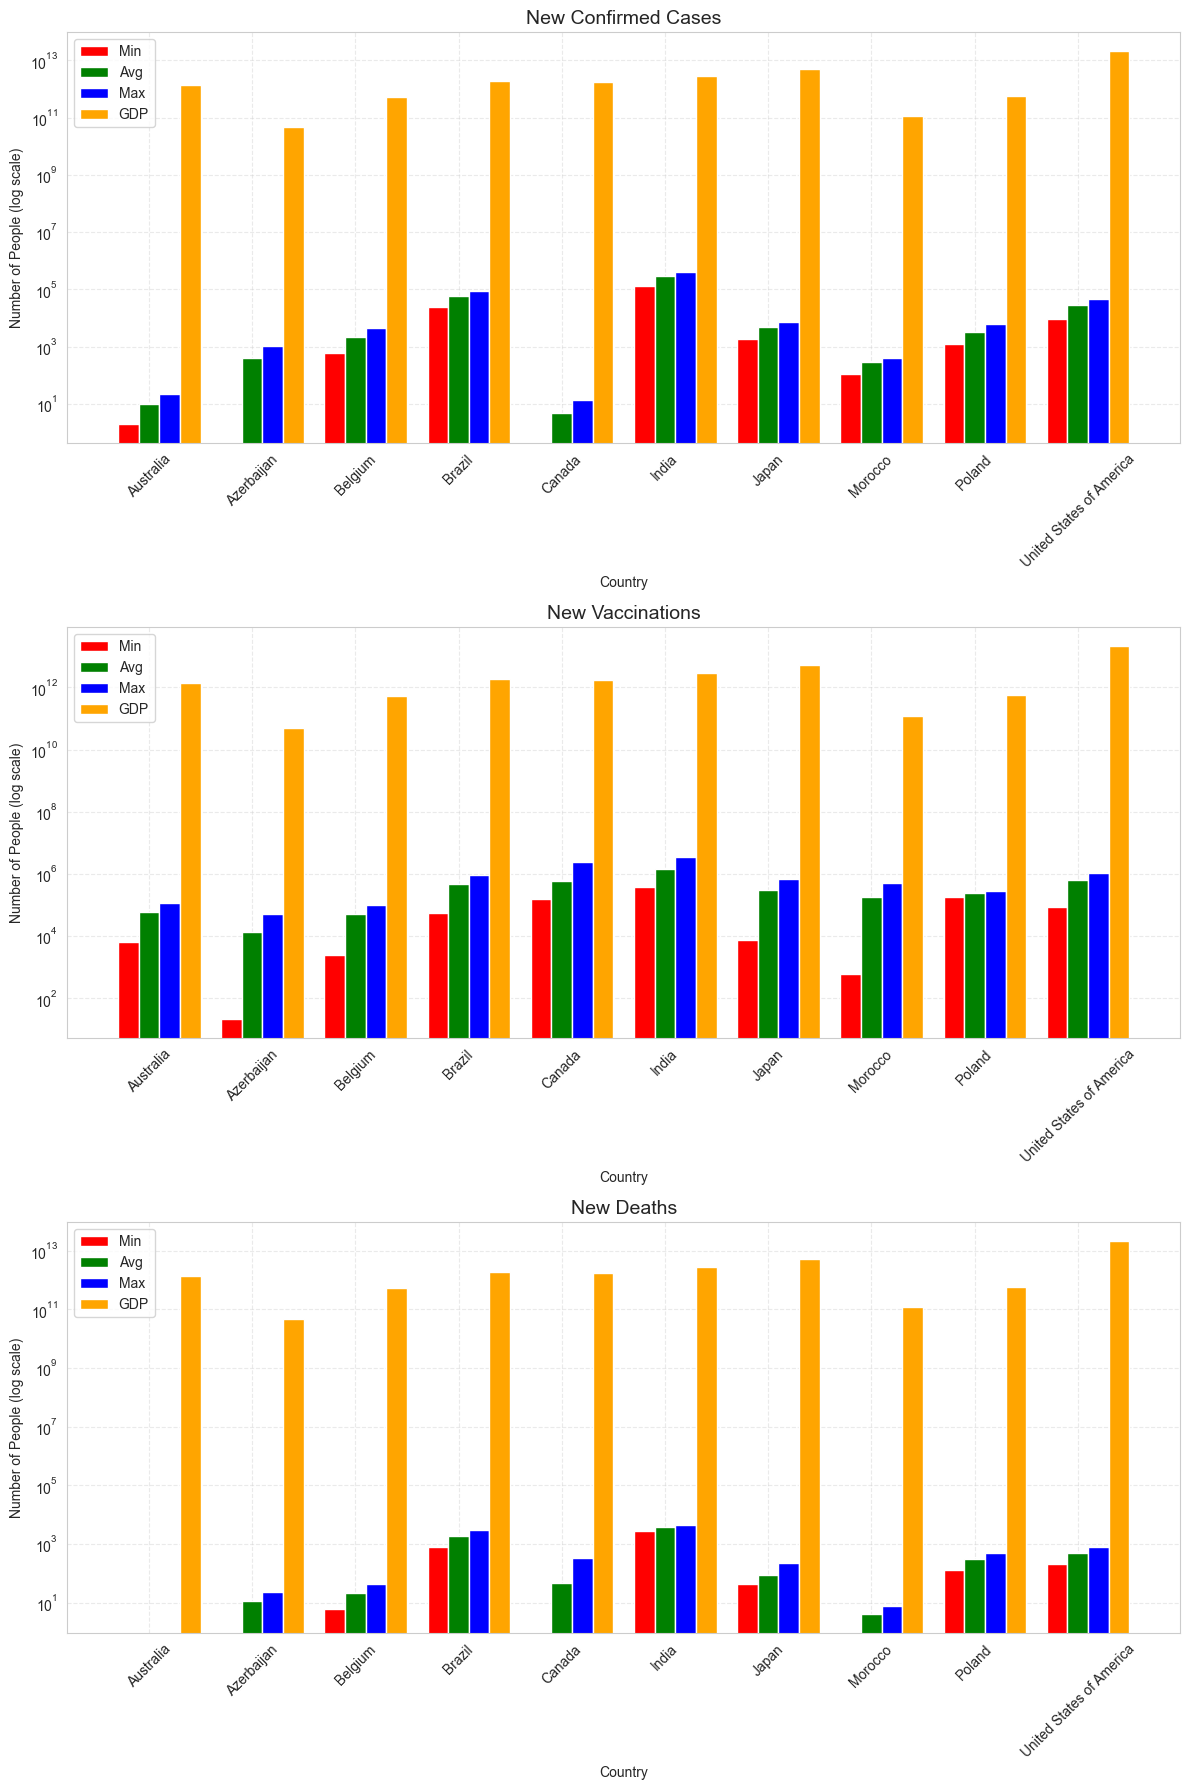

In [1856]:
fig, axes = plt.subplots(3, 1, figsize=(12, 18))

x = np.arange(len(merged))
width = 0.2

for i, metric in enumerate(metrics):
    ax = axes[i]

    ax.bar(x - width, merged[f'{metric}_min'], width=width, label='Min', color=colors[0])
    ax.bar(x,        merged[f'{metric}_avg'], width=width, label='Avg', color=colors[1])
    ax.bar(x + width, merged[f'{metric}_max'], width=width, label='Max', color=colors[2])
    ax.bar(x + 2 * width, merged['gdp_usd'],  width=width, label="GDP", color='orange')

    ax.set_title(titles[i], fontsize=14)
    ax.set_ylabel('Number of People (log scale)')
    ax.set_xlabel('Country')
    ax.set_xticks(x)
    ax.set_xticklabels(merged['country_name'], rotation=45)
    ax.legend()
    ax.grid(True, linestyle='--', alpha=0.4)
    ax.set_yscale('log')

plt.tight_layout()
plt.show()

3.6 minimalna, średnia i maksymalna liczba nowych zachorowań, szczepień i śmierci, a populacja co najmniej 10 wybranych krajów.

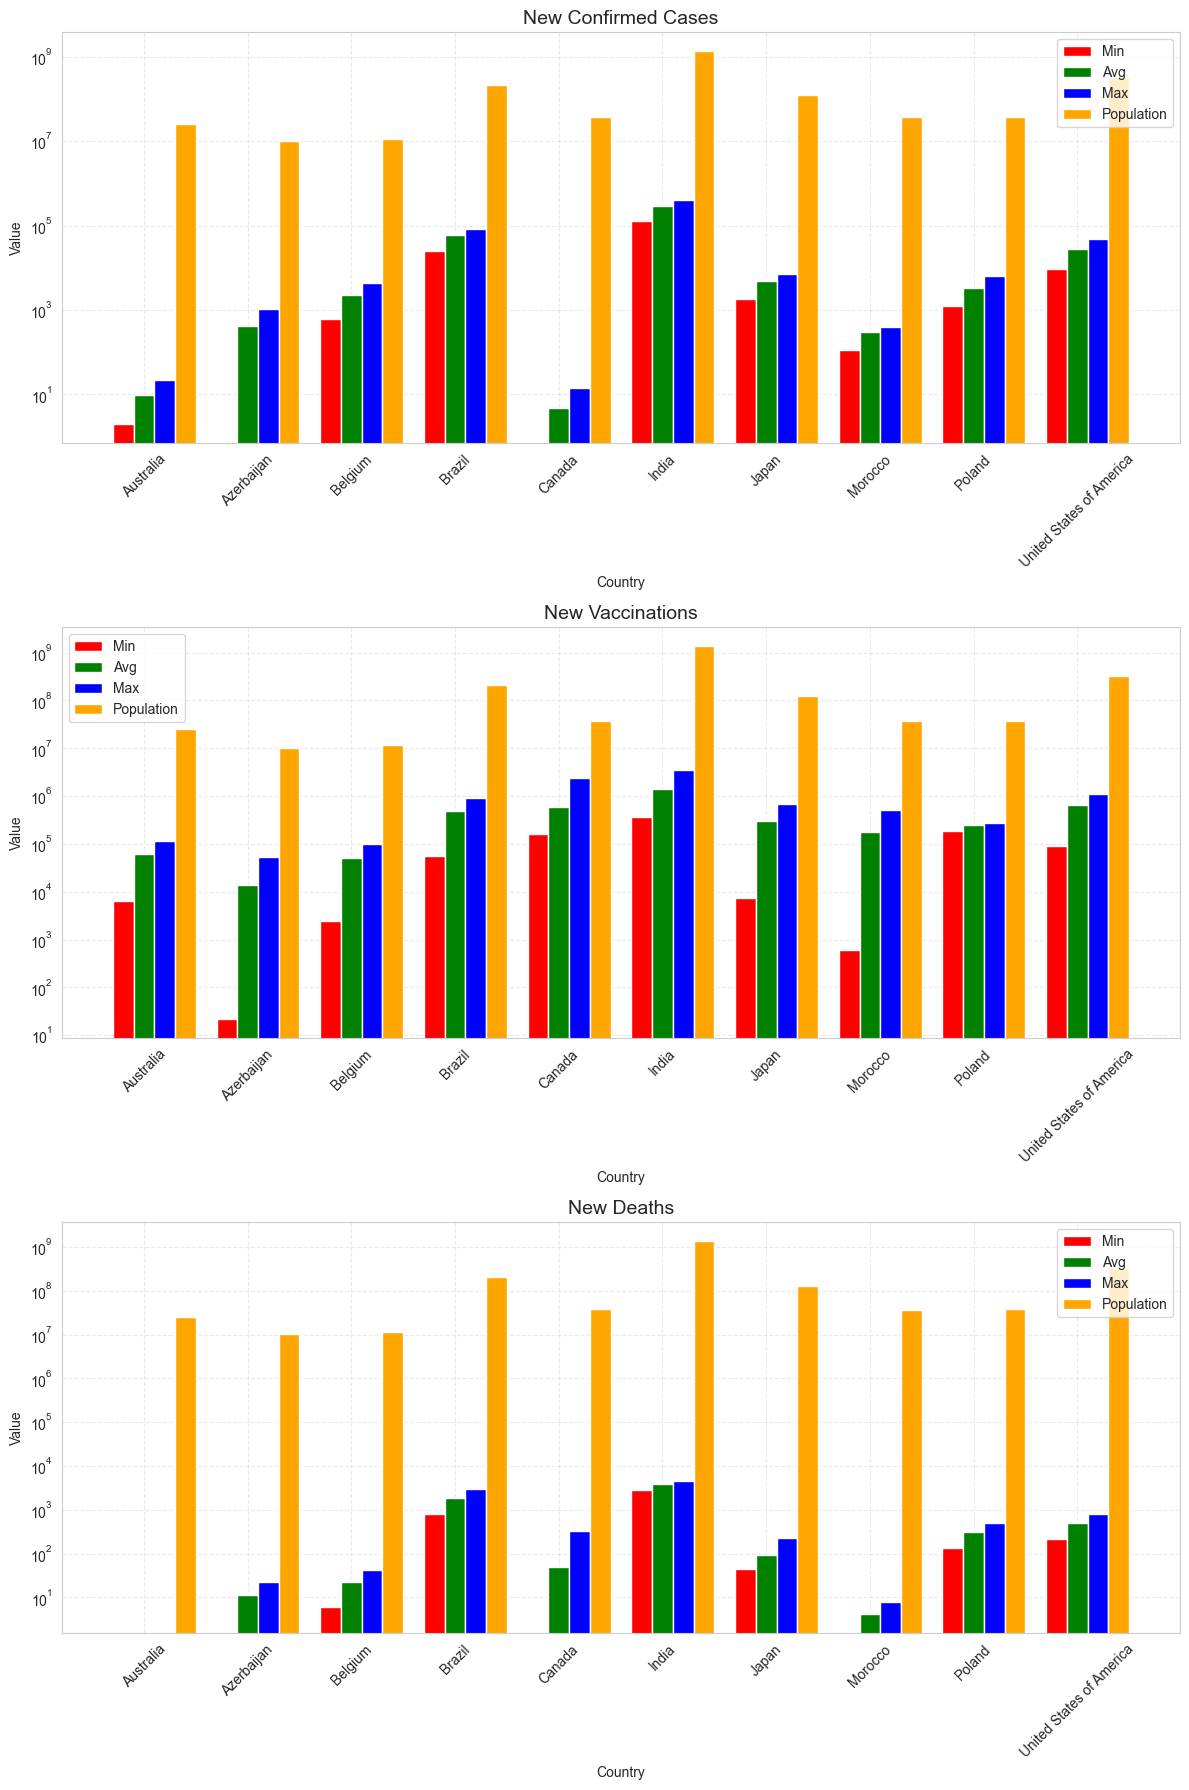

In [1857]:
merged = merged.merge(countries_df[['country_name', 'population']], on='country_name')

fig, axes = plt.subplots(3, 1, figsize=(12, 18))

for i, metric in enumerate(metrics):
    ax = axes[i]

    ax.bar(x - width, merged[f'{metric}_min'], width=width, label='Min', color=colors[0])
    ax.bar(x,        merged[f'{metric}_avg'], width=width, label='Avg', color=colors[1])
    ax.bar(x + width, merged[f'{metric}_max'], width=width, label='Max', color=colors[2])
    ax.bar(x + 2 * width, merged['population'],  width=width, label="Population", color='orange')

    ax.set_title(titles[i], fontsize=14)
    ax.set_ylabel('Value')
    ax.set_xlabel('Country')
    ax.set_xticks(x)
    ax.set_xticklabels(merged['country_name'], rotation=45)
    ax.legend()
    ax.grid(True, linestyle='--', alpha=0.4)
    ax.set_yscale('log')

plt.tight_layout()
plt.show()

In [1858]:
## Część 4
merged

,country_name,new_confirmed_min,new_persons_vaccinated_min,new_deceased_min,new_confirmed_avg,new_persons_vaccinated_avg,new_deceased_avg,new_confirmed_max,new_persons_vaccinated_max,new_deceased_max,gdp_usd,population
0,Australia,2,6341,0,9.620690,6.170855e+04,0.000000,22,116905,0,1392680589329,25499881
1,Azerbaijan,0,22,0,416.000000,1.371930e+04,11.555556,1080,53155,23,48047647058,10139175
2,Belgium,603,2417,6,2235.483871,5.057097e+04,22.322581,4331,99944,43,542587364000,11455519
3,Brazil,24619,56407,786,60856.225806,4.872036e+05,1903.548387,85536,933224,2966,1839758040765,212559409
4,Canada,0,162069,0,4.741935,5.956704e+05,48.741935,14,2368272,335,1736425629519,37742157
5,India,127510,375181,2795,284450.500000,1.425402e+06,3835.142857,414188,3553142,4529,2875142314811,1380004385
6,Japan,1785,7455,45,4957.225806,3.071305e+05,90.935484,7244,675188,228,5081769542379,126476458
7,Morocco,112,597,0,301.200000,1.810145e+05,4.200000,397,505967,8,118725279596,36910558
8,Poland,1230,185016,135,3369.250000,2.437248e+05,309.250000,6431,276410,510,585705873800,37972812
9,United States of America,9167,89146,219,28643.966667,6.532740e+05,511.300000,47264,1094704,787,21374418877706,331002647


In [1859]:
total_values = df.groupby('country_name').agg({
    'new_confirmed': 'sum',
    'new_persons_vaccinated': 'sum',
    'new_deceased': 'sum',
    'new_tested': 'sum',
    'new_vaccine_doses_administered': 'sum',
    'new_persons_fully_vaccinated': 'sum',
}).reset_index()
total_values = total_values.merge(
    countries_df[['country_name', 'health_expenditure_usd']],
    on='country_name', 
    how='left'
)

# Dodajemy dane o populacji i PKB
total_values = total_values.merge(
    countries_df[['country_name', 'population', 'gdp_usd']], 
    on='country_name', 
    how='left'
)


Normalizacja na 1000 osób

In [1860]:
total_values['cases_per_1000'] = total_values['new_confirmed'] / total_values['population'] * 1000
total_values['vaccinations_per_1000'] = total_values['new_persons_vaccinated'] / total_values['population'] * 1000
total_values['deaths_per_1000'] = total_values['new_deceased'] / total_values['population'] * 1000
total_values['tested_per_1000'] = total_values['new_tested'] / total_values['population'] * 1000
total_values['new_vaccine_doses_administered_per_1000'] = total_values['new_vaccine_doses_administered'] / total_values['population'] * 1000
total_values['new_persons_fully_vaccinated_per_1000'] = total_values['new_persons_fully_vaccinated'] / total_values['population'] * 1000
total_values['health_expenditure_usd_per_1000'] = total_values['health_expenditure_usd'] * 1000 / total_values['population'] * 1000

avg_values_covid_data = df.groupby(['country_name']).agg({'new_vaccine_doses_administered': 'mean', 'new_persons_fully_vaccinated': 'mean'})
avg_values_covid_data = avg_values_covid_data.reset_index()
avg_values_countries_data = countries_df[countries_df.country_name.isin(countries)].groupby(['country_name']).agg({'health_expenditure_usd': 'mean', 'out_of_pocket_health_expenditure_usd': 'mean'})
avg_values_countries_data = avg_values_countries_data.reset_index()
avg_values_covid_data #TODO: te z countries trzeba dać x1000 bo one są już per capita i dać rename, te z covid trzeba policzyć normalnie
#TODO: dodatkowe przypadki
# doses administered per 1000, fully vaccinated per 1000, health expenditure per 1000, out of pocket health expenditure per 1000

,country_name,new_vaccine_doses_administered,new_persons_fully_vaccinated
0,Australia,6.723521e+04,5.526655e+03
1,Azerbaijan,2.621359e+04,1.249430e+04
2,Belgium,9.194758e+04,4.137661e+04
3,Brazil,7.003292e+05,2.131256e+05
4,Canada,6.593631e+05,6.368810e+04
5,India,1.994543e+06,5.691405e+05
6,Japan,4.049552e+05,9.782477e+04
7,Morocco,2.414174e+05,6.040290e+04
8,Poland,4.196435e+05,1.759185e+05
9,United States of America,1.627800e+06,1.132099e+06


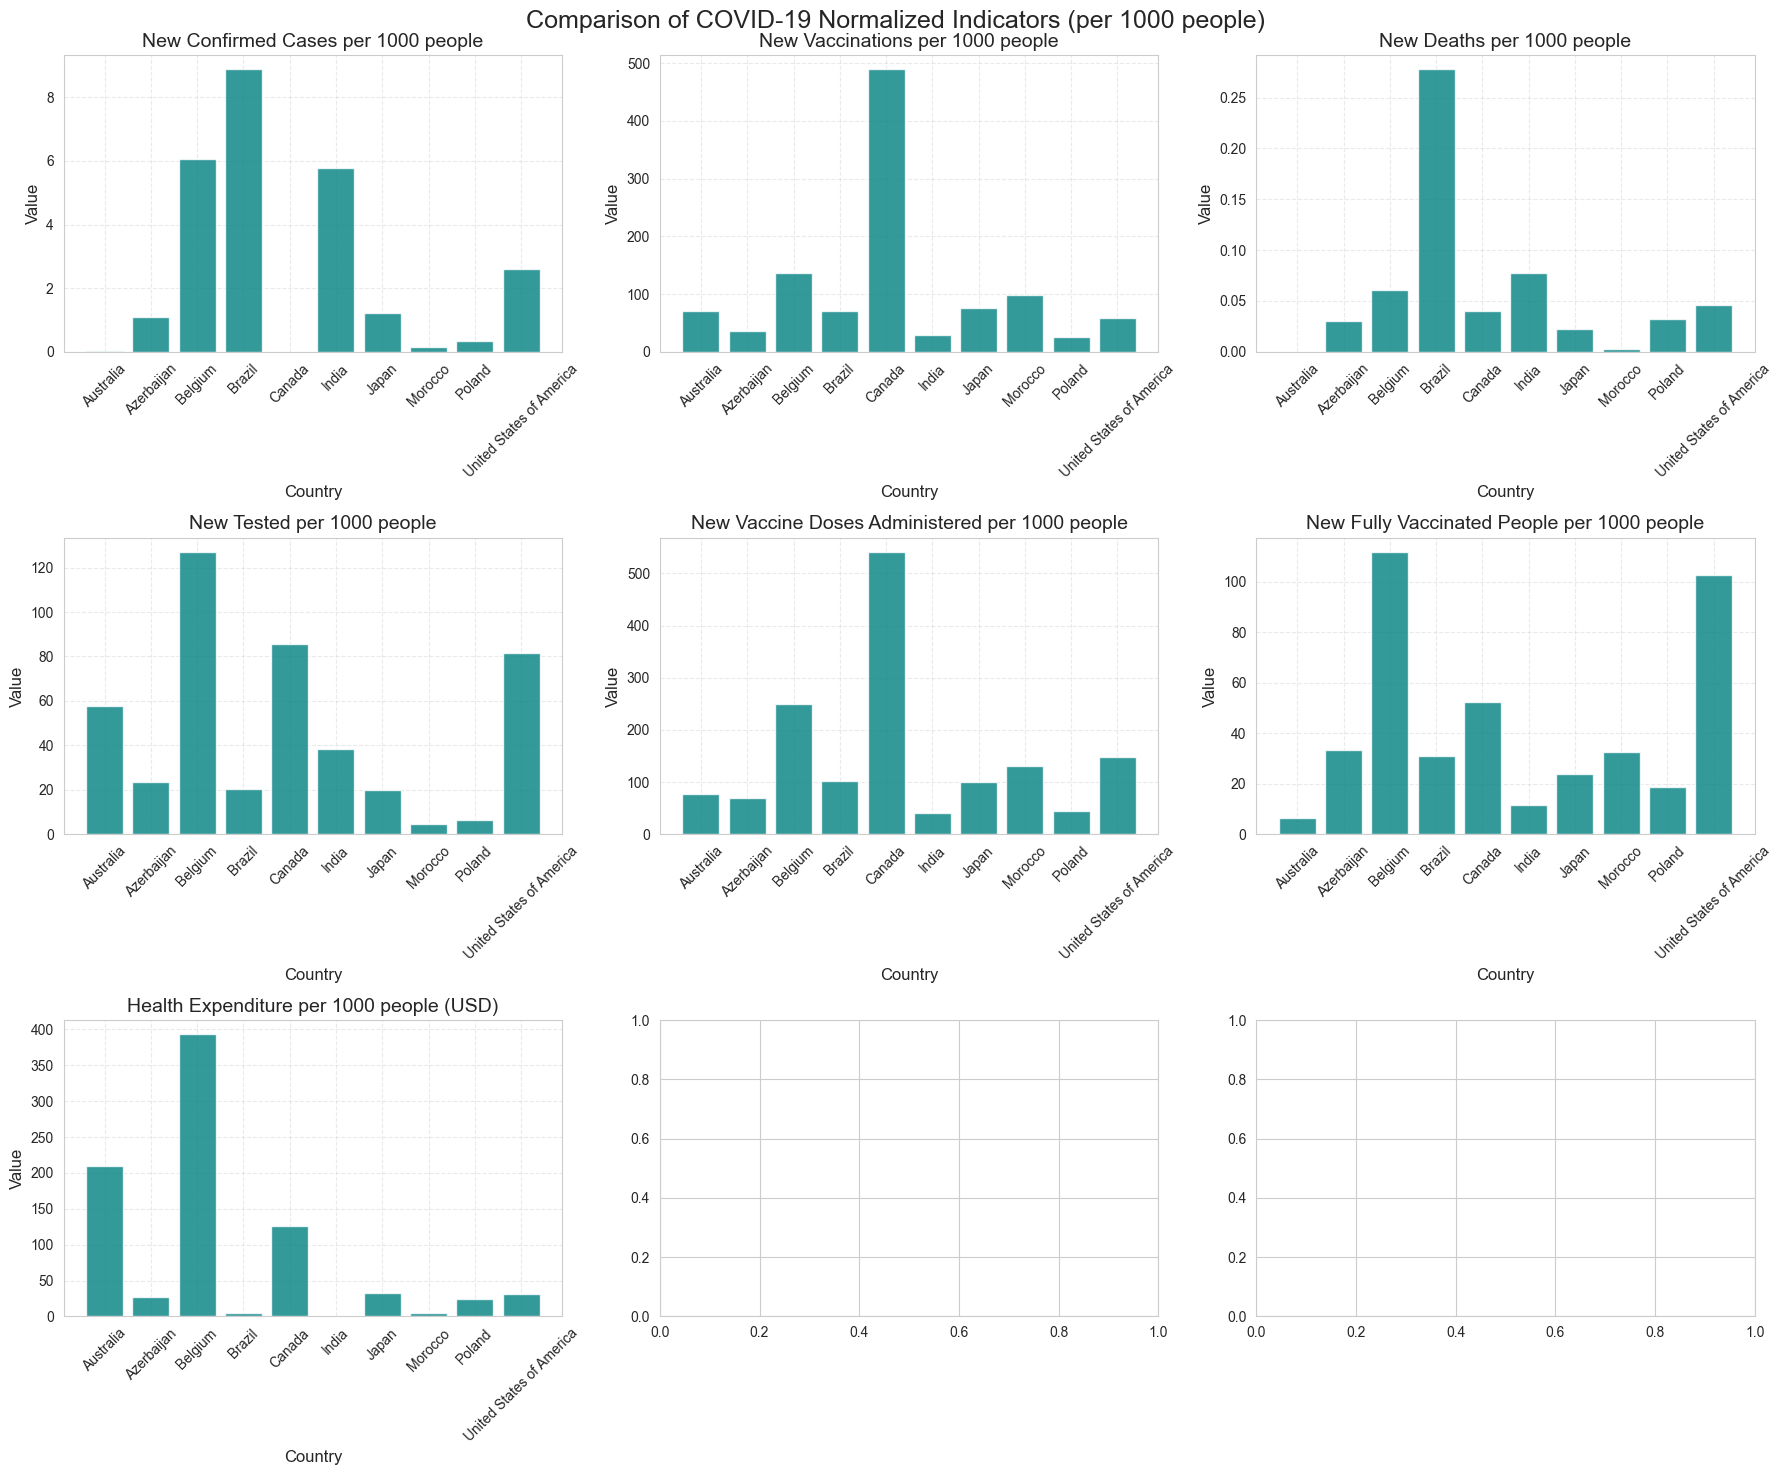

In [1861]:
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
fig.suptitle('Comparison of COVID-19 Normalized Indicators (per 1000 people)', fontsize=18)

# Lista metryk i tytułów w języku angielskim
indicators = [
    ('cases_per_1000', 'New Confirmed Cases per 1000 people'),
    ('vaccinations_per_1000', 'New Vaccinations per 1000 people'),
    ('deaths_per_1000', 'New Deaths per 1000 people'),
    ('tested_per_1000', 'New Tested per 1000 people'),
    ('new_vaccine_doses_administered_per_1000', 'New Vaccine Doses Administered per 1000 people'),
    ('new_persons_fully_vaccinated_per_1000', 'New Fully Vaccinated People per 1000 people'),
    ('health_expenditure_usd_per_1000', 'Health Expenditure per 1000 people (USD)')
]

# Wykresy
for idx, (col, title) in enumerate(indicators):
    row, col_pos = divmod(idx, 3)
    ax = axes[row, col_pos]
    
    countries = total_values['country_name']
    values = total_values[col]
    
    ax.bar(countries, values, color='teal', alpha=0.8)
    ax.set_title(title, fontsize=14)
    ax.set_ylabel('Value', fontsize=12)
    ax.set_xlabel('Country', fontsize=12)
    ax.tick_params(axis='x', rotation=45)
    ax.grid(True, linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()
